[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/corazzon/finance-data-analysis/blob/main/2.2.%20KRX%20%EC%A0%84%EC%B2%B4%20%EC%A2%85%EB%AA%A9%EB%B6%84%EC%84%9D-input.ipynb)

## 한국거래소(KRX) 전체 종목 분석
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* FinanceDataReader를 통한 KRX 전체 종목 수집
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## ⚠️ 주의할 점 ⚠️ 
* 강좌의 분석내용과 여러분의 실습 결과는 시점의 차이로 빈도수 등의 결과값이 다르게 나옵니다.



## 라이브러리 불러오기

In [1]:
# 데이터 분석을 위해 pandas, 시각화를 위해 seaborn 불러오기
import pandas as pd
import seaborn as sns

## FinanceDataReader 로 수집한 전체 종목 불러오기

* 한국 주식 가격, 미국주식 가격, 지수, 환율, 암호화폐 가격, 종목 리스팅 등 금융 데이터 수집 라이브러리

* [FinanceDataReader 사용자 안내서 | FinanceData](https://financedata.github.io/posts/finance-data-reader-users-guide.html)
* https://pandas-datareader.readthedocs.io/en/latest/readers/index.html

<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

## <font color="red">종목명이 영문으로 표기될 때</font>

해당 수업은 실시간으로 한국거래소에서 FinanceDataReader 라는 라이브러리를 통해 데이터를 받아오고 있습니다.
아래 링크에 있는 라이브러리의 소스코드가 KRX 전체 종목을 가져오는 소스코드입니다.

[FinanceDataReader/listing.py at master · FinanceData/FinanceDataReader](https://github.com/FinanceData/FinanceDataReader/blob/master/krx/listing.py)

이 때, 전체 상장종목과 거래할 수 있는 ETF 등의 종목도 함께 가져오게 되는데,
FinanceDataReader 에서는 코스피, 코스닥, 코넥스 정보가 있는 엑셀파일과 금융상품 정보가 있는 JSON 데이터를 가져와서 병합하는 형태로 데이터를 제공하고 있습니다.
그런데 최근 JSON 데이터의 종목명이 영문으로 변경되어 제공되고 있음을 확인했습니다.
그래서 아래의 엑셀 데이터를 read_html 로 읽어오게 되면 한글로 된 종목명을 받아서 분석해 보실 수 있습니다.

In [43]:
# 이전 강좌에서 to_csv로 저장해둔 krx.csv 파일을 pd.read_csv 로 불러옵니다.
# krx 파일이 없다면 아래 주석을 제거하고 csv 파일을 로드해 보세요!
# df = pd.read_csv("https://raw.githubusercontent.com/corazzon/finance-data-analysis/main/krx.csv")
df = pd.read_csv("krx.csv")

df_krx = pd.read_csv("https://raw.githubusercontent.com/corazzon/finance-data-analysis/main/krx.csv")

In [44]:
df_krx

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도
...,...,...,...,...,...,...,...,...,...,...
2607,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2608,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2609,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
2610,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시


### 일부 데이터만 가져오기

{'회사명':'Name', '종목코드':'Symbol', '업종':'Sector', '주요제품':'Industry', 
                            '상장일':'ListingDate', '결산월':'SettleMonth',  '대표자명':'Representative', 
                            '홈페이지':'HomePage', '지역':'Region', }

In [45]:
# head 로 위에 있는 데이터 일부만 가져옵니다.
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [47]:
# tail 로 아래 있는 데이터 일부만 가져옵니다.
df_krx.tail(10)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2602,069260,KOSPI,휴켐스,기타 화학제품 제조업,"화합물,화학제품 제조",2002-10-07,12월,신진용,http://www.huchems.com,서울특별시
2603,024060,KOSDAQ,흥구석유,기타 전문 도매업,휘발유등,1994-12-07,12월,김상우,NaN,대구광역시
2604,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도
2605,189980,KOSDAQ,흥국에프엔비,비알코올음료 및 얼음 제조업,"과일음료(에이드베이스, 스무디, 착즙쥬스 등)",2015-08-07,12월,"박철범, 오길영",http://www.hyungkuk.com,서울특별시
2606,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시
2607,000547,KOSPI,흥국화재2우B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2608,000545,KOSPI,흥국화재우,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2609,003280,KOSPI,흥아해운,해상 운송업,외항화물운송업(케미컬탱커),1976-06-29,12월,이환구,http://www.heung-a.com,서울특별시
2610,037440,KOSDAQ,희림,"건축기술, 엔지니어링 및 관련 기술 서비스업",설계 및 감리용역,2000-02-03,12월,"정영균, 이목운, 허철호, 염두성 (각자대표)",http://www.heerim.com,서울특별시
2611,238490,KOSDAQ,힘스,특수 목적용 기계 제조업,"OLED Mask 인장기, OLED Mask 검사기 등",2017-07-20,12월,김주환,http://www.hims.co.kr,인천광역시


In [49]:
# sample을 사용하면 랜덤하게 ()안의 갯수만큼 가져오기 
df_krx.sample(2)

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
934,072950,KOSDAQ,빛샘전자,전자부품 제조업,"전광판용 LED 모듈, LED 전광판, 광접속함체",2012-03-21,12월,강만준,http://www.vissem.com,경기도
338,024110,KOSPI,기업은행,은행 및 저축기관,은행업,2003-12-24,12월,윤종원,http://www.kiupbank.co.kr,서울특별시


## 데이터 요약하기

In [50]:
# info 로 요약 데이터 보기
df_krx.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2612 entries, 0 to 2611
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Symbol          2612 non-null   object
 1   Market          2612 non-null   object
 2   Name            2612 non-null   object
 3   Sector          2411 non-null   object
 4   Industry        2391 non-null   object
 5   ListingDate     2411 non-null   object
 6   SettleMonth     2411 non-null   object
 7   Representative  2411 non-null   object
 8   HomePage        2238 non-null   object
 9   Region          2411 non-null   object
dtypes: object(10)
memory usage: 204.2+ KB


In [52]:
# describe 로 기술통계값 보기
df_krx.describe()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
count,2612,2612,2612,2411,2391,2411,2411,2411,2238,2411
unique,2612,3,2612,158,2240,1777,9,2298,2217,21
top,060310,KOSDAQ,3S,특수 목적용 기계 제조업,기업인수합병,1976-06-30,12월,김상우,http://www.woory.com,서울특별시
freq,1,1471,1,141,37,8,2351,4,2,969


In [53]:
# 중복을 제외한 unique 값의 갯수 보기.
df_krx.nunique()

Symbol            2612
Market               3
Name              2612
Sector             158
Industry          2240
ListingDate       1777
SettleMonth          9
Representative    2298
HomePage          2217
Region              21
dtype: int64

In [54]:
# index 값 보기
df_krx.index

RangeIndex(start=0, stop=2612, step=1)

In [12]:
# 컬럼값 보기
df.columns

Index(['Unnamed: 0', 'Code', 'ISU_CD', 'Name', 'Market', 'Dept', 'Close',
       'ChangeCode', 'Changes', 'ChagesRatio', 'Open', 'High', 'Low', 'Volume',
       'Amount', 'Marcap', 'Stocks', 'MarketId'],
      dtype='object')

In [55]:
# 값만 보기
df_krx.values

array([['060310', 'KOSDAQ', '3S', ..., '박종익, 김세완 (각자 대표이사)',
        'http://www.3sref.com', '서울특별시'],
       ['095570', 'KOSPI', 'AJ네트웍스', ..., '이현우',
        'http://www.ajnet.co.kr', '서울특별시'],
       ['006840', 'KOSPI', 'AK홀딩스', ..., '채형석, 이석주(각자 대표이사)',
        'http://www.aekyunggroup.co.kr', '서울특별시'],
       ...,
       ['003280', 'KOSPI', '흥아해운', ..., '이환구', 'http://www.heung-a.com',
        '서울특별시'],
       ['037440', 'KOSDAQ', '희림', ..., '정영균, 이목운, 허철호, 염두성 (각자대표)',
        'http://www.heerim.com', '서울특별시'],
       ['238490', 'KOSDAQ', '힘스', ..., '김주환', 'http://www.hims.co.kr',
        '인천광역시']], dtype=object)

## 데이터 색인하기

### Series
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [56]:
# Name 컬럼 가져오기
df_krx["Name"]

0            3S
1        AJ네트웍스
2         AK홀딩스
3        APS홀딩스
4         AP시스템
         ...   
2607    흥국화재2우B
2608      흥국화재우
2609       흥아해운
2610         희림
2611         힘스
Name: Name, Length: 2612, dtype: object

In [58]:
# df["Name"] 의 type을 봅니다.
type(df_krx["Name"])

pandas.core.series.Series

In [59]:
# 0번째 행만 가져오기
df_krx.loc[0]

Symbol                          060310
Market                          KOSDAQ
Name                                3S
Sector                   특수 목적용 기계 제조업
Industry                   반도체 웨이퍼 캐리어
ListingDate                 2002-04-23
SettleMonth                        03월
Representative      박종익, 김세완 (각자 대표이사)
HomePage          http://www.3sref.com
Region                           서울특별시
Name: 0, dtype: object

In [61]:
# df.loc[0] 의 type을 봅니다.
type(df_krx.loc[0])

pandas.core.series.Series

### DataFrame
<img src="https://pandas.pydata.org/docs/_images/01_table_dataframe.svg">

In [62]:
# df 변수의 타입을 봅니다.
type(df_krx)

pandas.core.frame.DataFrame

In [64]:
# 여러 컬럼을 지정
df_krx[["Symbol", "Name"]].head()

,Symbol,Name
0,060310,3S
1,095570,AJ네트웍스
2,006840,AK홀딩스
3,054620,APS홀딩스
4,265520,AP시스템


In [65]:
# 여러 개의 행을 가져올 때도 [] 대괄호를 통해 리스트 형태로 묶을 것
df_krx.loc[[0, 3, 5, 7]]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
5,211270,KOSDAQ,AP위성,통신 및 방송 장비 제조업,위성통신 단말기,2016-03-04,12월,류장수,http://www.apsi.co.kr,서울특별시
7,282330,KOSPI,BGF리테일,종합 소매업,체인화 편의점,2017-12-08,12월,이건준,http://www.bgfretail.com,서울특별시


In [67]:
# 1개의 컬럼을 가져올 때도 대괄호[] 2개를 써서 리스트 형태로 묶어주게 되면 데이터프레임 형태로 반환
# "Name" 을 데이터프레임으로 가져올 것
df_krx[["Name"]].head()

,Name
0,3S
1,AJ네트웍스
2,AK홀딩스
3,APS홀딩스
4,AP시스템


### loc를 통한 서브셋 가져오기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [68]:
# 행과 열 함께 가져오기
# .loc[행, 열]
df_krx["Name"][0]

'3S'

In [69]:
# .loc[행, 열]
df_krx.loc[0, "Name"]

'3S'

In [70]:
df_krx.loc[[0, 1, 2], "Name"]

0        3S
1    AJ네트웍스
2     AK홀딩스
Name: Name, dtype: object

In [72]:
# 여러 개의 행과 하나의 컬럼 가져오기
# .loc[행, 열]
df_krx.loc[[0, 1, 2], ["Name", "Symbol"]]

,Name,Symbol
0,3S,060310
1,AJ네트웍스,095570
2,AK홀딩스,006840


### Boolean Indexing
* 결과값이 True, False bool 형태로 반환되기 때문에 boolean indexing 이라고 부릅니다.
* boolean indexing 을 사용해 특정 조건식을 만족하는 데이터를 서브셋으로 가져옵니다.

<img src="https://pandas.pydata.org/docs/_images/03_subset_rows.svg">

In [73]:
# 카카오 찾기
df_krx[df_krx["Name"] == "카카오"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
2009,035720,KOSPI,카카오,"자료처리, 호스팅, 포털 및 기타 인터넷 정보매개 서비스업",인터넷 서비스(인터넷 광고),2017-07-10,12월,"여민수, 조수용",http://www.kakaocorp.com,제주특별자치도


<img src="https://pandas.pydata.org/pandas-docs/stable/_images/03_subset_columns_rows.svg">

In [74]:
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도


In [78]:
# 서울특별시에 소재지를 두고 있는 KOSPI 종목의 종목명과 심볼을 가져오기
# .loc[행, 열]
# .loc[조건식, 열]
df_krx.loc[(df_krx["Region"] == "서울특별시") & (df_krx["Market"] == "KOSPI"), ["Name", "Symbol"]]

,Name,Symbol
1,AJ네트웍스,095570
2,AK홀딩스,006840
6,BGF,027410
7,BGF리테일,282330
9,BYC,001460
...,...,...
2596,휴비스,079980
2598,휴스틸,005010
2602,휴켐스,069260
2606,흥국화재,000540


## 파생변수 만들기

In [80]:
# pd.to_datetime 을 통해 데이터의 타입을 변환합니다.
df_krx["ListingDate"] = pd.to_datetime(df_krx["ListingDate"])

In [82]:
# ListingYear 파생변수 만들기
df_krx["ListingYear"] = df_krx["ListingDate"].dt.year
df_krx.head()

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
1,095570,KOSPI,AJ네트웍스,산업용 기계 및 장비 임대업,"렌탈(파렛트, OA장비, 건설장비)",2015-08-21,12월,이현우,http://www.ajnet.co.kr,서울특별시,2015.0
2,006840,KOSPI,AK홀딩스,기타 금융업,지주사업,1999-08-11,12월,"채형석, 이석주(각자 대표이사)",http://www.aekyunggroup.co.kr,서울특별시,1999.0
3,054620,KOSDAQ,APS홀딩스,기타 금융업,인터넷 트래픽 솔루션,2001-12-04,12월,정기로,http://www.apsholdings.co.kr,경기도,2001.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0


In [84]:
# nan은 not a number의 약자로 결측치를 의미
import numpy as np
type(np.nan)

float

In [86]:
df_krx[["ListingDate", "ListingYear"]].dtypes

ListingDate    datetime64[ns]
ListingYear           float64
dtype: object

## 데이터 시각화 툴 소개

### matplotlib
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/3.1.1/gallery/showcase/anatomy.html)

### seaborn
* [seaborn: statistical data visualization — seaborn documentation](https://seaborn.pydata.org/index.html)

### pandas
* [Visualization — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html)

## 데이터 시각화를 위한 폰트설정

In [87]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

In [88]:
get_font_family()

'Malgun Gothic'

In [89]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.
import matplotlib.pyplot as plt

# ggplot으로 그래프 스타일 설정
plt.style.use("ggplot")

font_family = get_font_family()
# 폰트설정
plt.rc("font", family=font_family)
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)
# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

C:\Users\user\AppData\Local\Temp\ipykernel_20120\1991645101.py:15: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


### 폰트 설정 확인하기

<AxesSubplot:title={'center':'한글폰트'}>

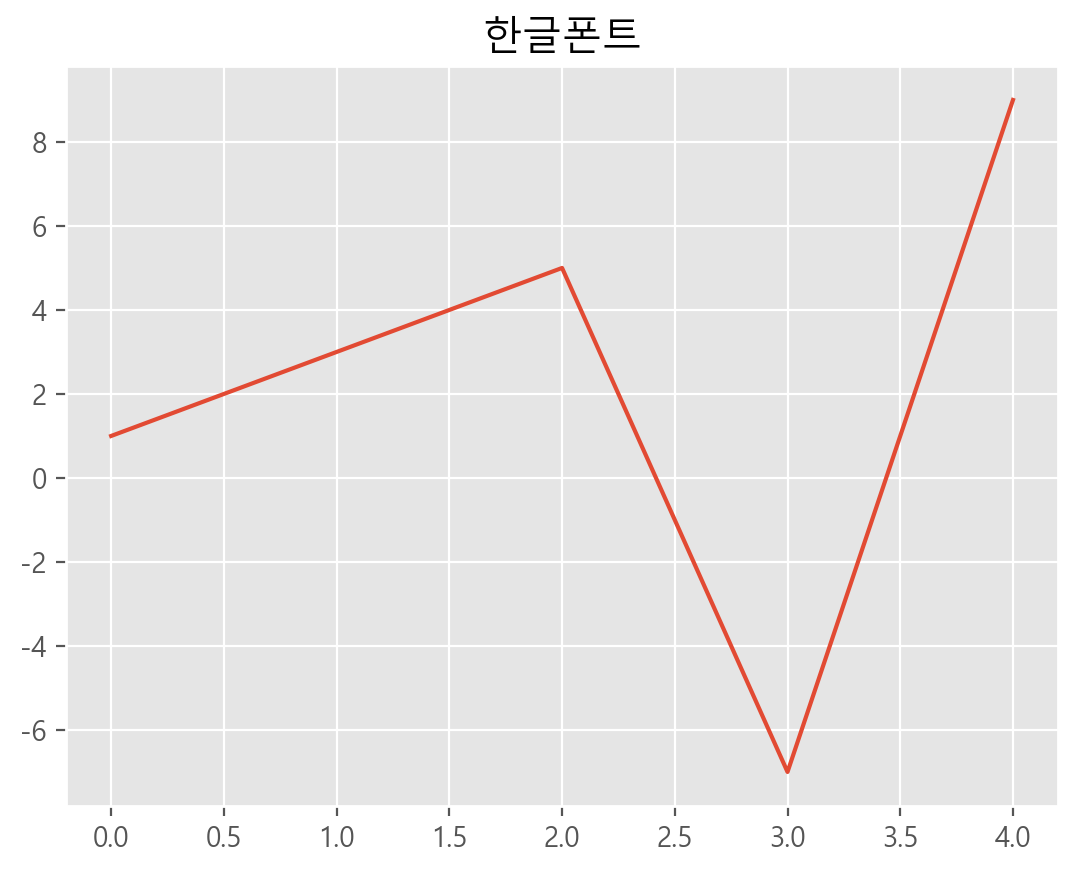

In [90]:
# 한글폰트 확인하기
pd.Series([1, 3, 5, -7, 9]).plot(title="한글폰트")

## 한 개의 변수 빈도수 구하고 시각화 하기
* Keyword

    * Series.value_counts()
    * Series.value_counts().plot()
    * Series.value_counts().plot.bar()
    * Series.value_counts().plot.barh()
    * sns.countplot()

### Market

* KOSPI (Korea Composite Stock Price Index) 
    * 우리나라의 종합주가지수(KOSPI)는 증권거래소가 1964.1.4일을 기준시점으로 다우존스식 주가평균을 지수화한 수정주가 평균지수를 산출, 발표하기 시작하였다. 다우존스식 주가지수는 주가지수를 구성하는 상장종목 중 일부 우량주만을 선정하여 산출하는 방식이다. 시가총액식 주가지수는 일정시점의 시가총액과 현재시점의 시가총액을 대비, 현재의 주가수준을 판단하는 방식이다. 즉, 지난 1980년 1월 4일 기준 상장종목 전체의 시가총액을 100으로 보고 현재 상장종목들의 시가총액이 어느 수준에 놓여 있는지를 보여주는 시스템이다.
    * 종합주가지수 = (비교시점의 시가총액 ÷ 기준시점의 시가총액) × 100
    * 출처 : [네이버 지식백과] 종합주가지수 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=72147&cid=43667&categoryId=43667


* KOSDAQ (Korea Securities Dealers Automated Quotation) 
    * 미국의 나스닥(NASDAQ)을 한국식으로 합성한 용어로 1996년 7월 1일 증권업협회와 증권사들이 설립한 코스닥증권(주)에 의하여 개설되었다. 코스닥의 개장으로 단순히 증권거래소 상장을 위한 예비적 단계였던 장외시장이 미국의 나스닥(NASDAQ)과 같이 자금조달 및 투자시장으로 독립적인 역할을 수행하게 되었다. 이후 2005년 1월 유가증권시장, 코스닥시장, 선물시장이 증권선물거래소(현 한국거래소)로 통합됨에 따라 코스닥시장도 거래소가 개설한 정규시장으로 편입되었다. 코스닥은 유가증권시장에 비해 진입요건이 상대적으로 덜 까다롭기 때문에 주로 중소벤처기업들이 상장되어 있다.
    * 출처 : [네이버 지식백과] KOSDAQ (매일경제, 매경닷컴) https://terms.naver.com/entry.nhn?docId=18639&cid=43659&categoryId=43659


* KONEX(Korea New Exchange) : 
    * 일정 요건을 갖춘 비상장 기업에 문호를 개방하기 위해 개설하는 유가증권시장, 코스닥시장에 이은 제3의 주식시장을 일컫는다. 코넥스시장은 우수한 기술력을 보유하고 있음에도 불구하고, 짧은 경력 등을 이유로 자금 조달에 어려움을 겪는 초기 중소기업과 벤처기업이 자금을 원활하게 조달할 수 있도록 하기 위해 설립된 자본시장으로, 2013년 7월 1일 개장되었다. 
    * 출처 : [네이버 지식백과] 코넥스 (시사상식사전, pmg 지식엔진연구소) https://terms.naver.com/entry.nhn?docId=1006691&cid=43667&categoryId=43667

In [92]:
# Market column에 어떤 데이터들이 있는지 확인
df_krx["Market"].unique()

array(['KOSDAQ', 'KOSPI', 'KONEX'], dtype=object)

In [93]:
# value_counts()로 빈도수를 구합니다.
df_krx["Market"].value_counts()

KOSDAQ    1471
KOSPI      998
KONEX      143
Name: Market, dtype: int64

<AxesSubplot:>

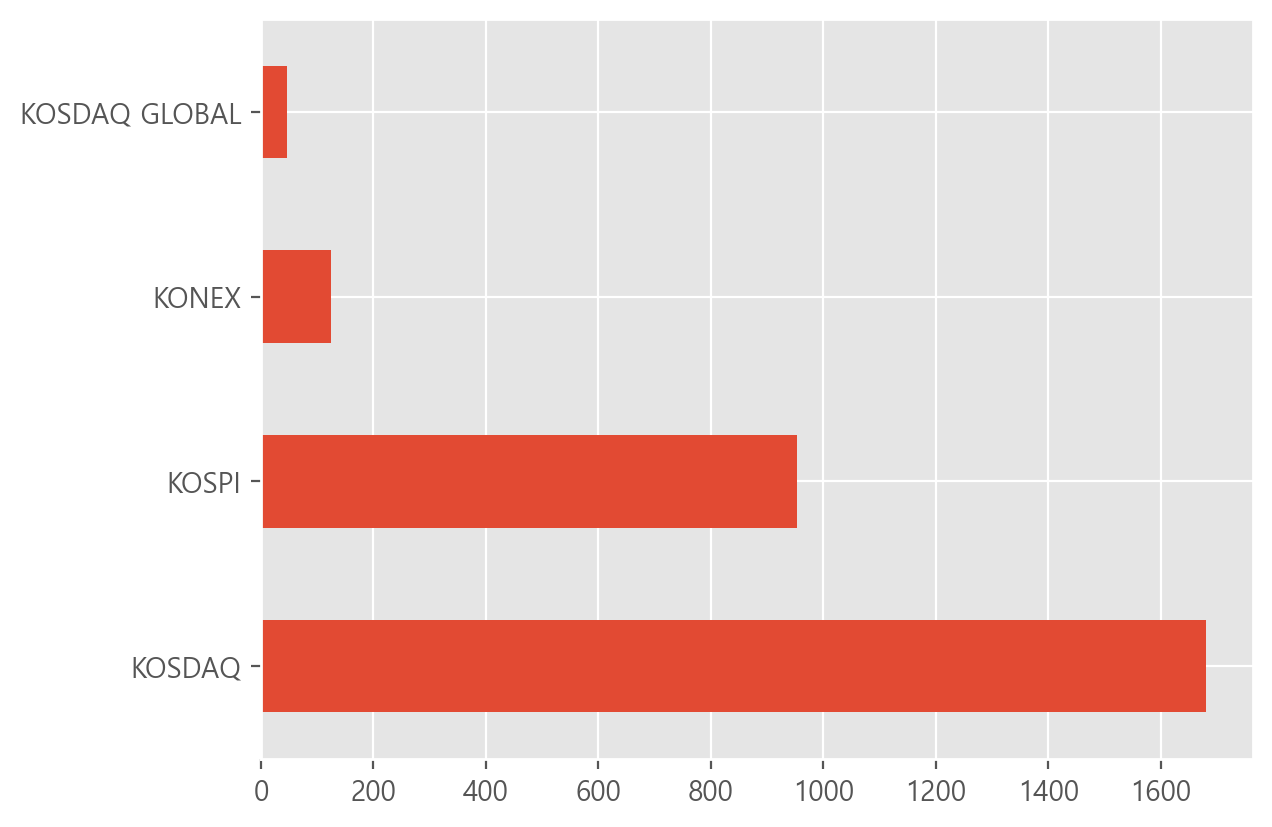

In [94]:
# 빈도수 시각화
df["Market"].value_counts().plot.barh()

<AxesSubplot:xlabel='count', ylabel='Market'>

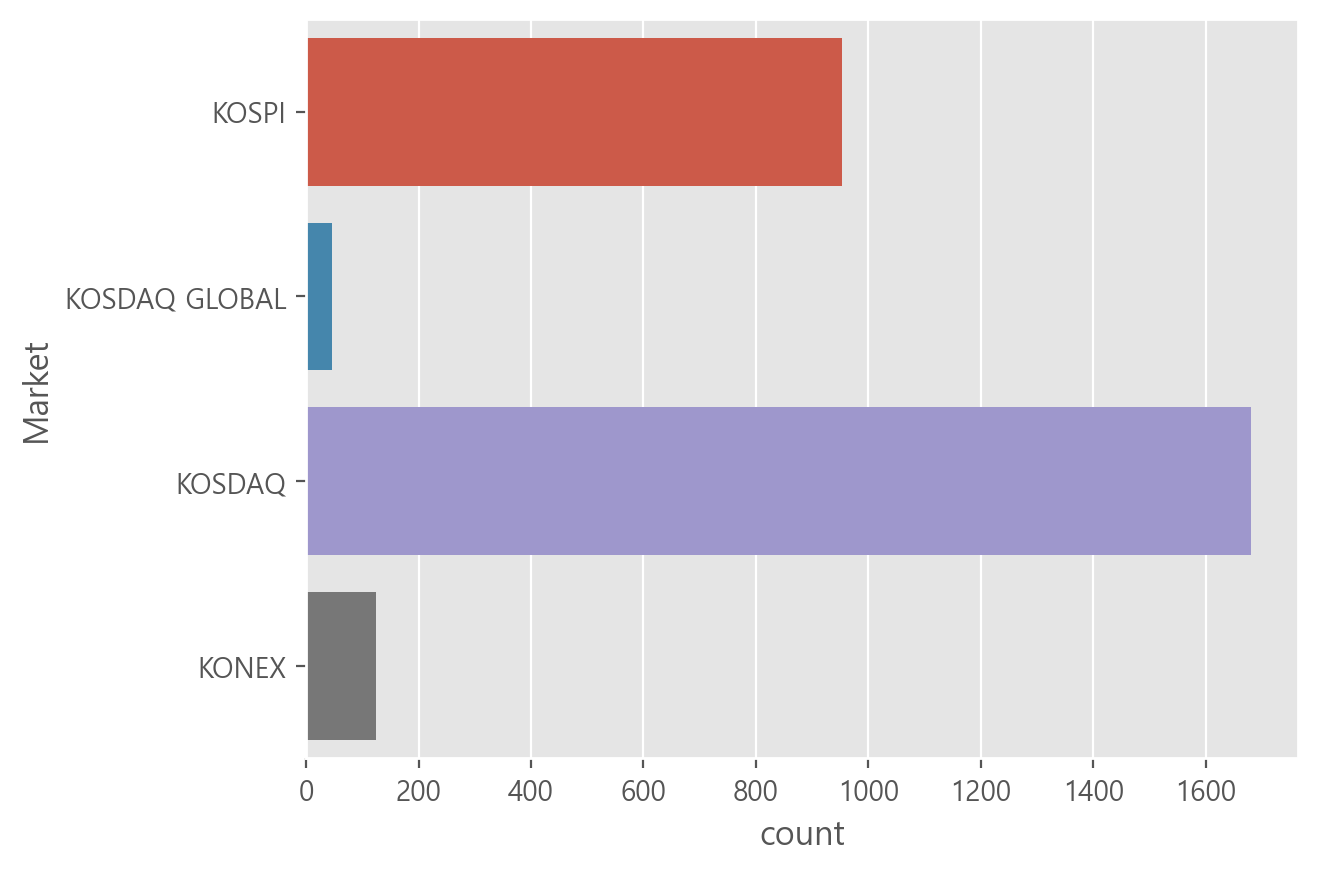

In [95]:
# Seaborn countplot 활용하여 빈도 수 표현
sns.countplot(data=df, y="Market")

### Sector

In [96]:
# 섹터의 빈도수를 구하기
# 상위 30개 섹터의 빈도수를 sector_count_top 변수에 할당
sector_count_top = df_krx["Sector"].value_counts().head(30)
sector_count_top

특수 목적용 기계 제조업                            141
소프트웨어 개발 및 공급업                           135
전자부품 제조업                                 121
자동차 신품 부품 제조업                             97
의약품 제조업                                   93
기타 금융업                                    92
기타 화학제품 제조업                               90
통신 및 방송 장비 제조업                            72
금융 지원 서비스업                                71
1차 철강 제조업                                 57
반도체 제조업                                   57
자연과학 및 공학 연구개발업                           53
의료용 기기 제조업                                50
일반 목적용 기계 제조업                             44
플라스틱제품 제조업                                43
기초 화학물질 제조업                               43
기타 전문 도매업                                 42
기초 의약물질 및 생물학적 제제 제조업                     38
컴퓨터 프로그래밍, 시스템 통합 및 관리업                   35
전동기, 발전기 및 전기 변환 · 공급 · 제어 장치 제조업         34
영화, 비디오물, 방송프로그램 제작 및 배급업                 34
기타 식품 제조업                                 33
의료용품 및 기타 

<AxesSubplot:xlabel='count', ylabel='Sector'>

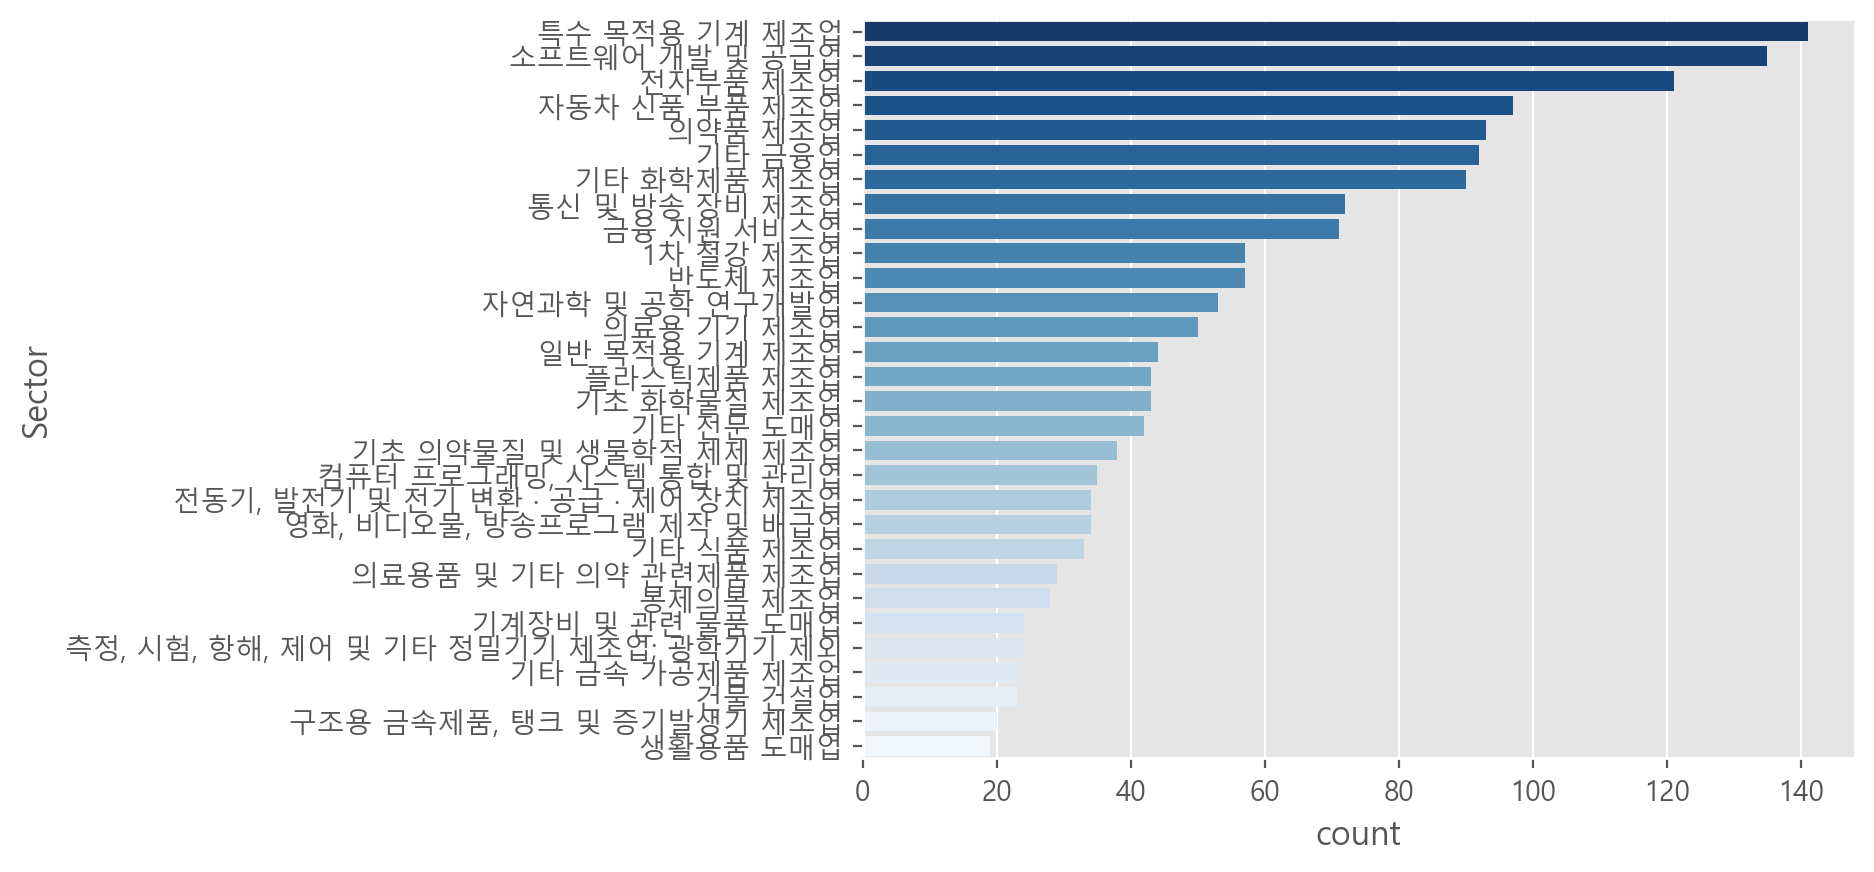

In [100]:
# Seaborn countplot 활용하여 빈도수를 표현
sns.countplot(data=df_krx[df_krx["Sector"].isin(sector_count_top.index)], 
              y="Sector", palette="Blues_r",
              order=sector_count_top.index)

In [98]:
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

In [102]:
# 빈도수가 가장 많은 데이터 색인하기
df_krx[df_krx["Sector"] == "특수 목적용 기계 제조업"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
0,060310,KOSDAQ,3S,특수 목적용 기계 제조업,반도체 웨이퍼 캐리어,2002-04-23,03월,"박종익, 김세완 (각자 대표이사)",http://www.3sref.com,서울특별시,2002.0
4,265520,KOSDAQ,AP시스템,특수 목적용 기계 제조업,디스플레이 제조 장비,2017-04-07,12월,김영주,http://www.apsystems.co.kr,경기도,2017.0
35,068790,KOSDAQ,DMS,특수 목적용 기계 제조업,LCD 제조장비,2004-10-01,12월,박용석,http://www.dms21.co.kr,경기도,2004.0
53,083450,KOSDAQ,GST,특수 목적용 기계 제조업,"GasScrubber,Chiller",2006-02-01,12월,김덕준,http://www.gst-in.com,경기도,2006.0
60,078150,KOSDAQ,HB테크놀러지,특수 목적용 기계 제조업,TFT-LCD검사장비,2004-12-08,12월,문성준,http://www.ncbnet.co.kr,충청남도,2004.0
...,...,...,...,...,...,...,...,...,...,...,...
2573,010660,KOSPI,화천기계,특수 목적용 기계 제조업,"선반,밀링,연삭기,CNC선반,CNC밀링,머시닝센타 제조,판매/자동차부품(실린더블럭) 제조",1988-12-12,12월,"권영열, 권형석",http://www.hwacheon.co.kr,서울특별시,1988.0
2574,000850,KOSPI,화천기공,특수 목적용 기계 제조업,"CNC선반,CNC밀링,연마기(금속공작기계),MC공작기계,COPY밀링기계,주방품 제조,도매",1999-11-18,12월,"각자대표이사 권영두, 권영렬",http://www.hwacheon.com,광주광역시,1999.0
2590,090710,KOSDAQ,휴림로봇,특수 목적용 기계 제조업,제조업용로봇및서비스로봇,2006-12-05,12월,정광원,http://www.dstrobot.com,충청남도,2006.0
2604,010240,KOSDAQ,흥국,특수 목적용 기계 제조업,굴삭기 Roller 및 형단조품,2009-05-12,12월,류명준,http://www.heungkuk.co.kr,충청남도,2009.0


### Industry

In [104]:
# Industry 의 빈도수를 구하기
df_krx["Industry"].value_counts()

기업인수합병                                            37
지주회사                                              18
지주사업                                               9
모바일게임                                              7
기업 인수 및 합병                                         7
                                                  ..
관류보일러,진공온수보일러,무압온수보일러,난방기 제조,판매                    1
자동차부품(엔진부품,조향장치부품,브레이장치부품,오토미셧부품) 제조,도매/부동산 임대     1
레미콘 제조,판매                                          1
도시가스 배관공급,가스기기 판매,설비공사                             1
OLED Mask 인장기, OLED Mask 검사기 등                     1
Name: Industry, Length: 2240, dtype: int64

<AxesSubplot:>

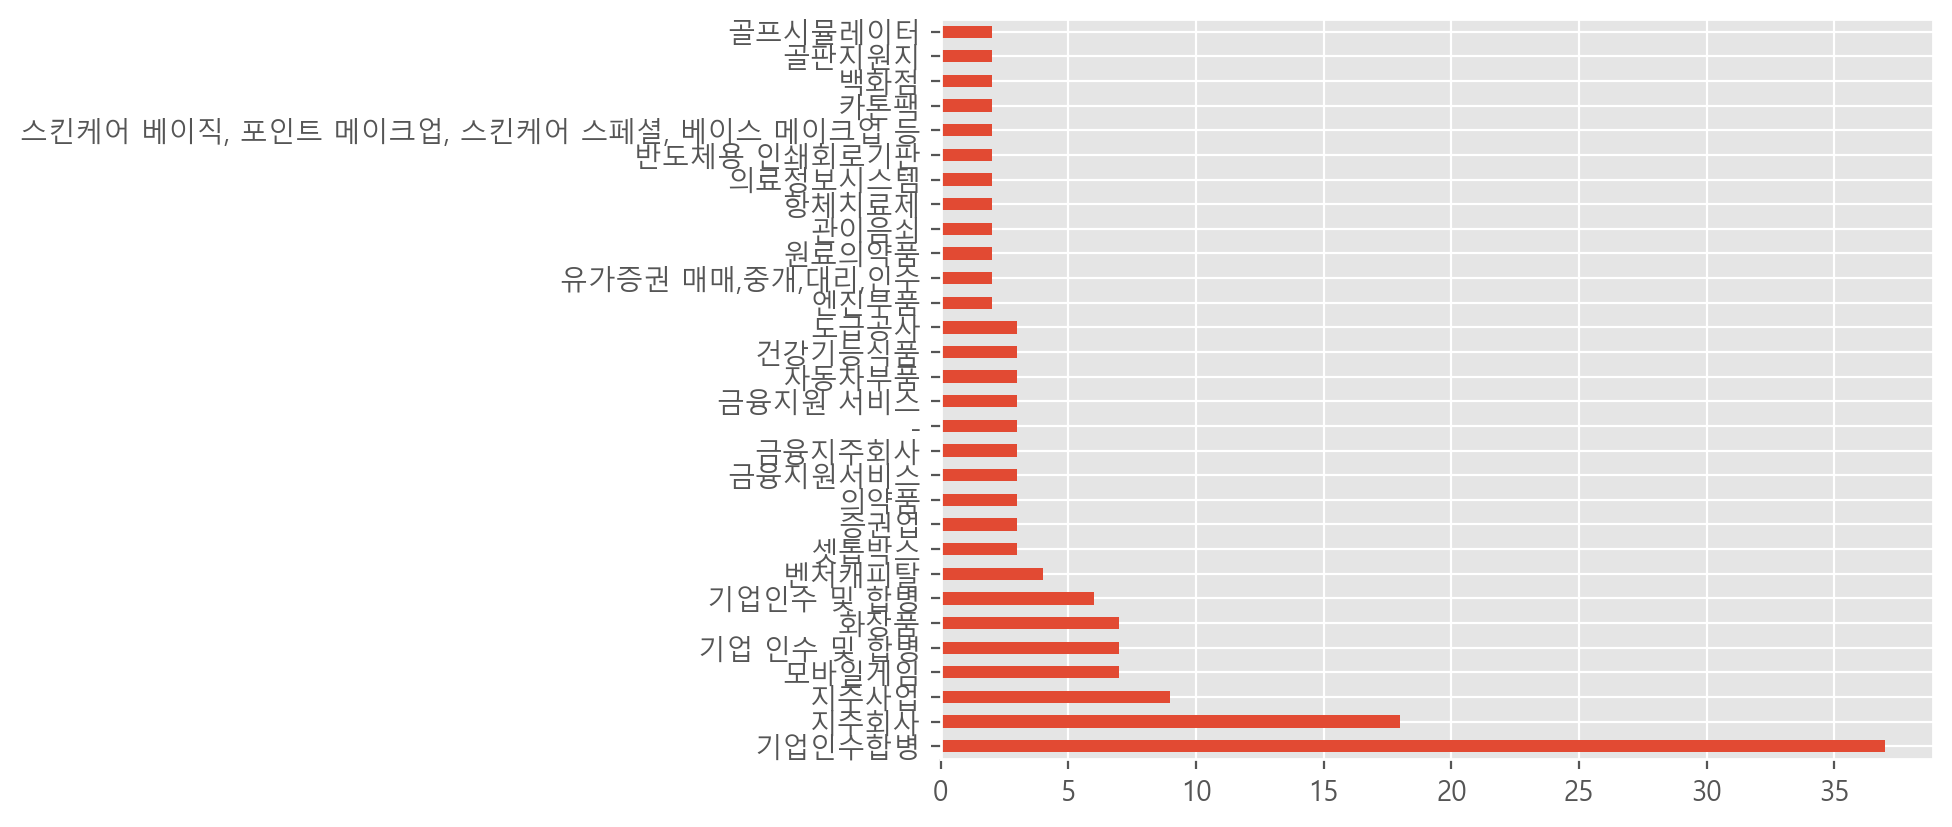

In [106]:
# Industry 30위까지의 빈도수를 pandas 의 plot 기능을 사용해 시각화
df_krx["Industry"].value_counts().head(30).plot.barh()

<AxesSubplot:>

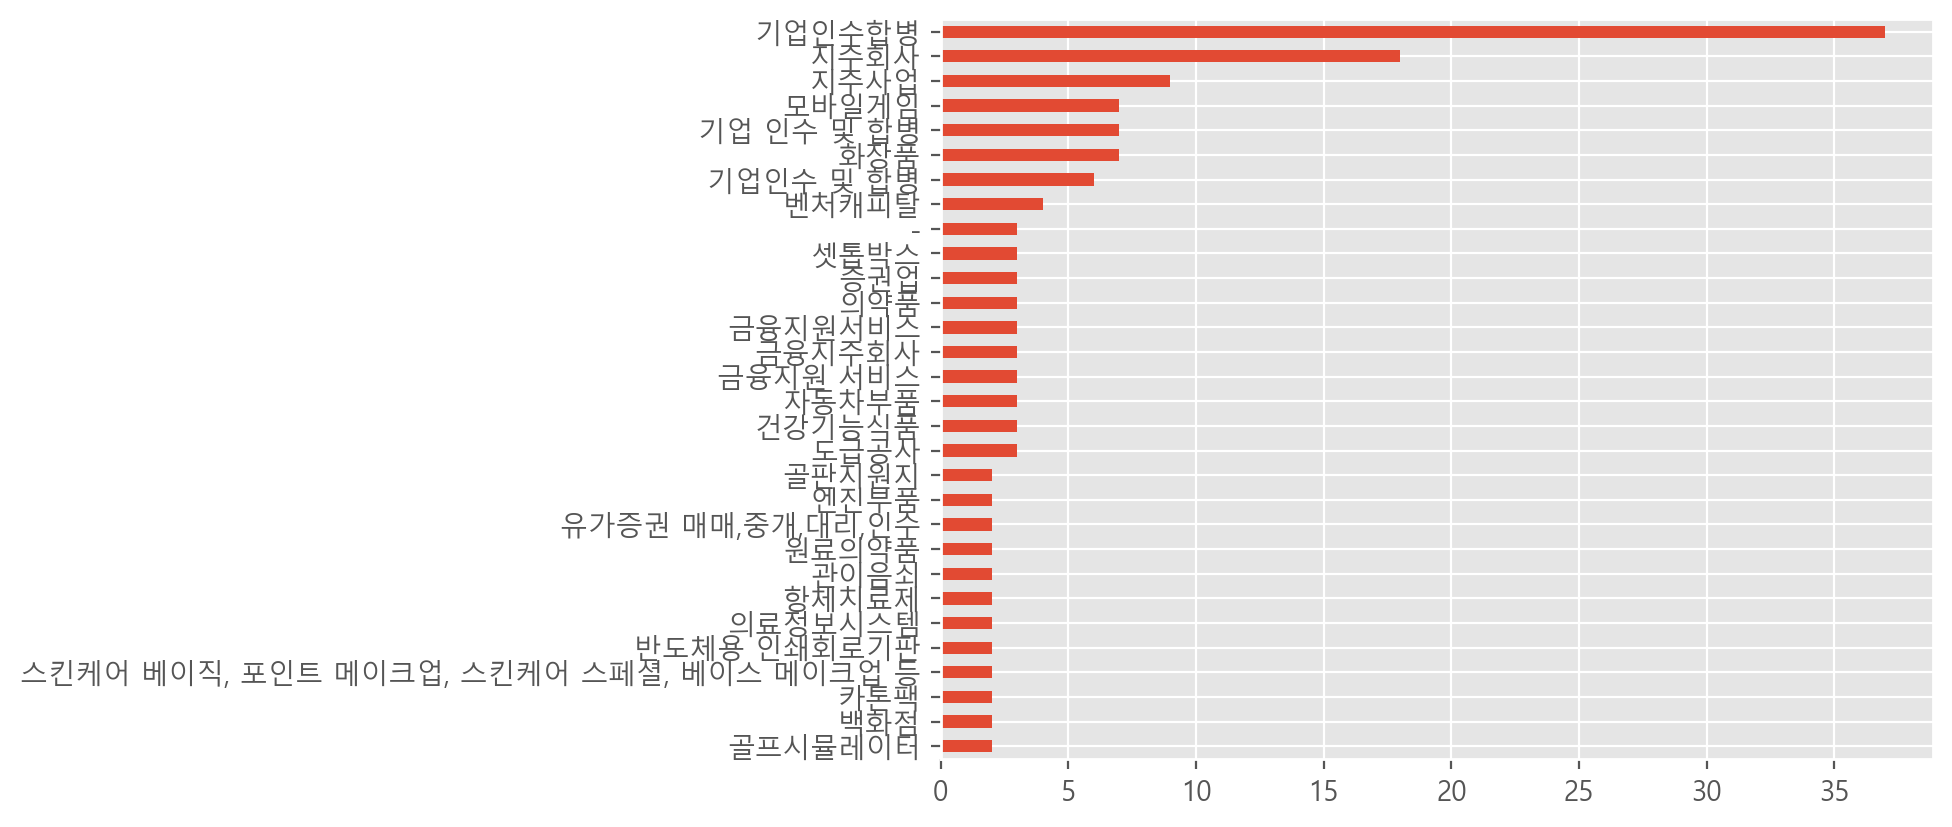

In [108]:
# sort_values 기능을 사용해 반대로 정렬해서 표시
df_krx["Industry"].value_counts().head(30).sort_values().plot.barh()

### Region 

<AxesSubplot:>

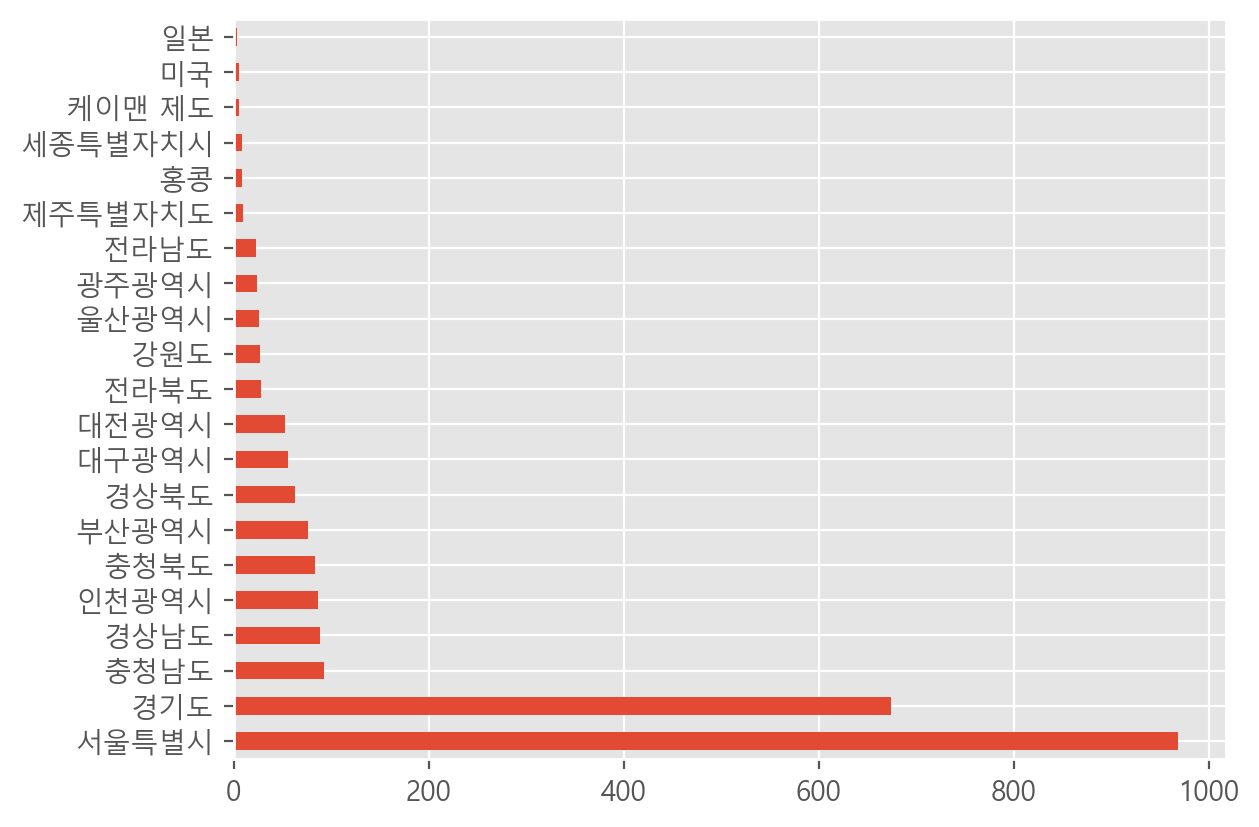

In [110]:
# Region 의 빈도수를 구하기
df_krx["Region"].value_counts().plot.barh()

In [111]:
df_krx["Region"].value_counts().index

Index(['서울특별시', '경기도', '충청남도', '경상남도', '인천광역시', '충청북도', '부산광역시', '경상북도',
       '대구광역시', '대전광역시', '전라북도', '강원도', '울산광역시', '광주광역시', '전라남도', '제주특별자치도',
       '홍콩', '세종특별자치시', '케이맨 제도', '미국', '일본'],
      dtype='object')

Text(0.5, 1.0, '소재지별 종목 수')

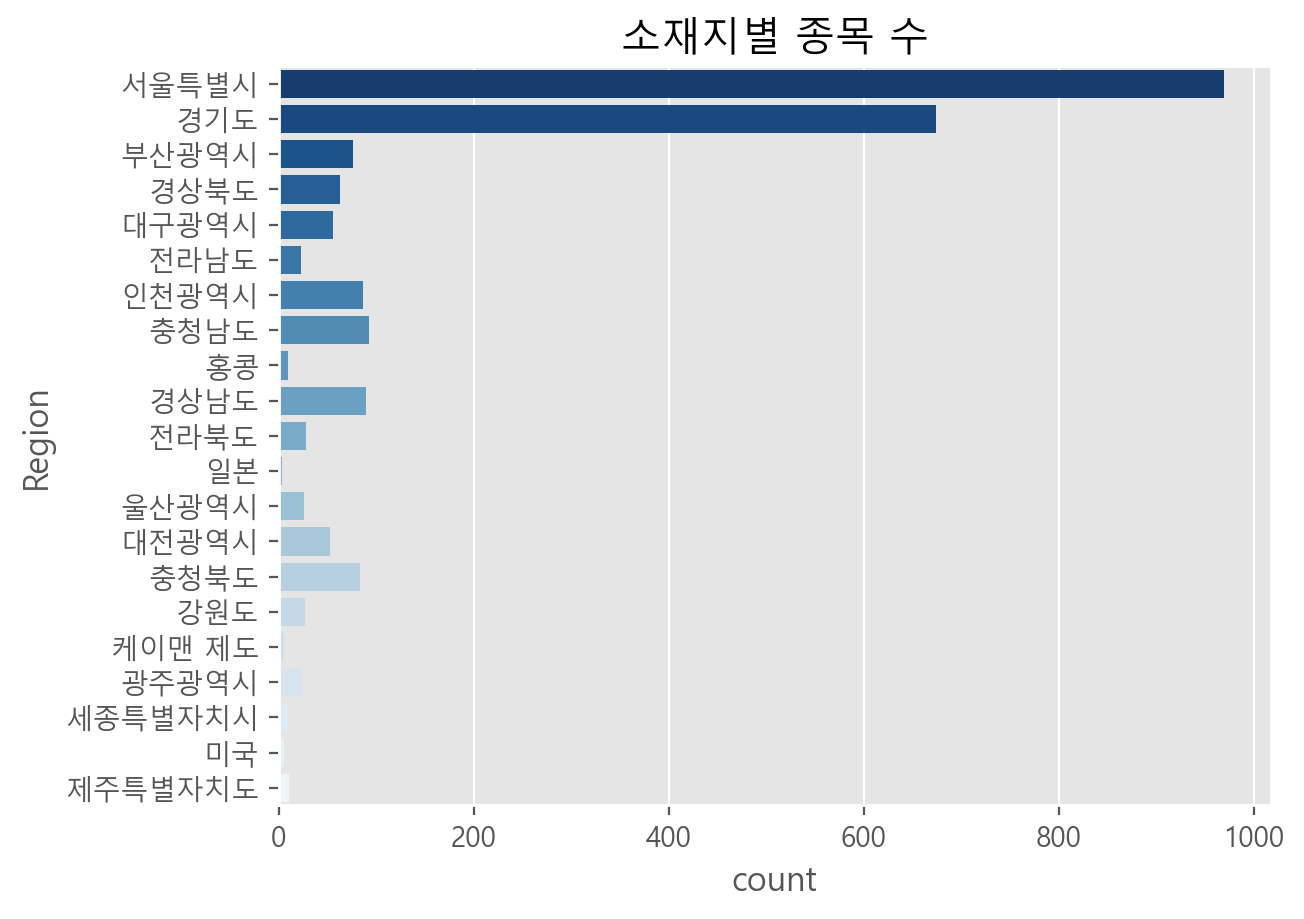

In [113]:
# Region 의 빈도수를 seaborn 의 countplot 으로 그리기
sns.countplot(data=df_krx, y="Region", 
              palette="Blues_r").set_title("소재지별 종목 수")

Text(0.5, 1.0, '소재지별 종목 수')

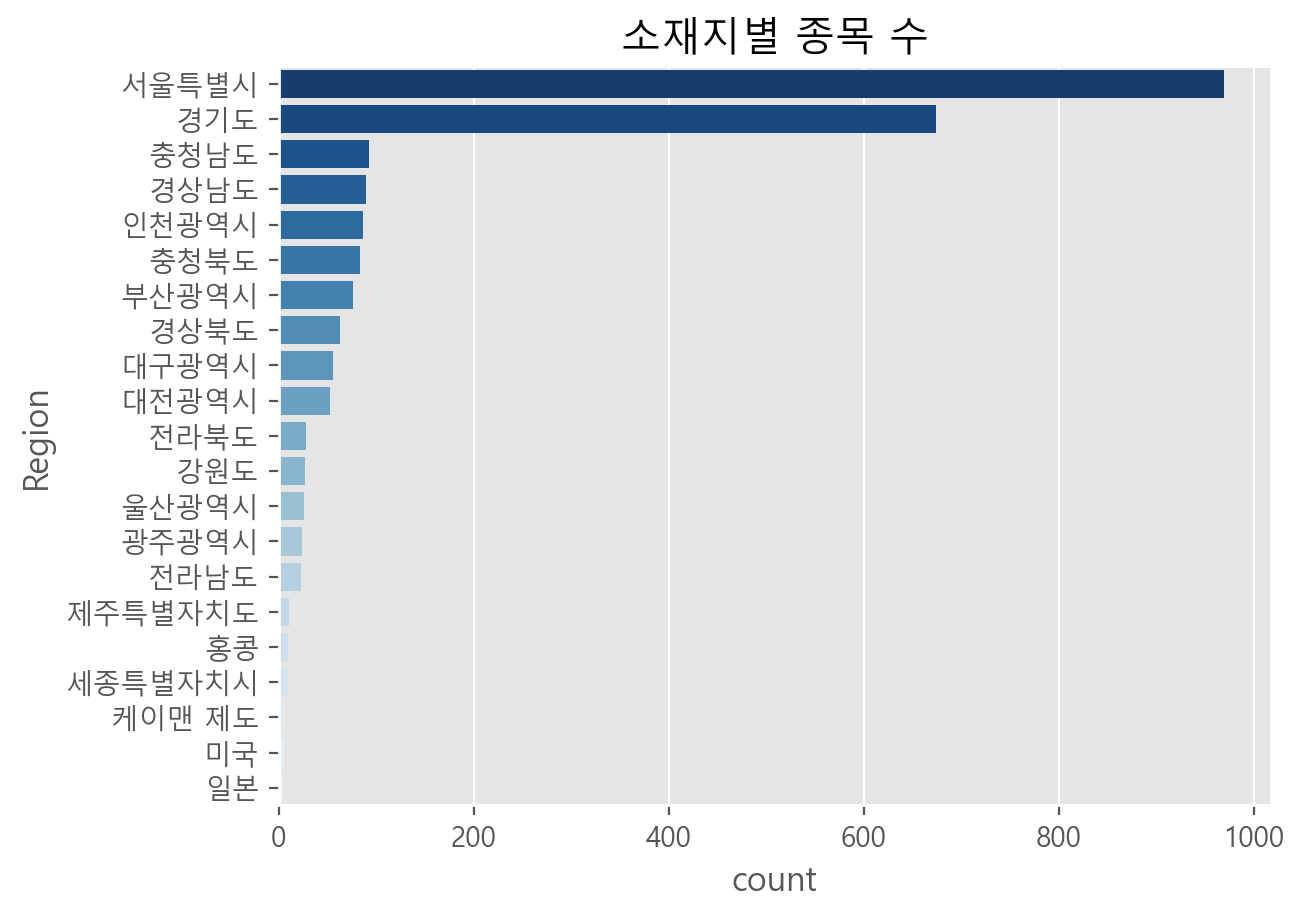

In [115]:
# order 기능을 통해 빈도수를 정렬

sns.countplot(data=df_krx, y="Region", 
              palette="Blues_r",
              order=df_krx["Region"].value_counts().index).set_title("소재지별 종목 수")

<AxesSubplot:xlabel='count', ylabel='Region'>

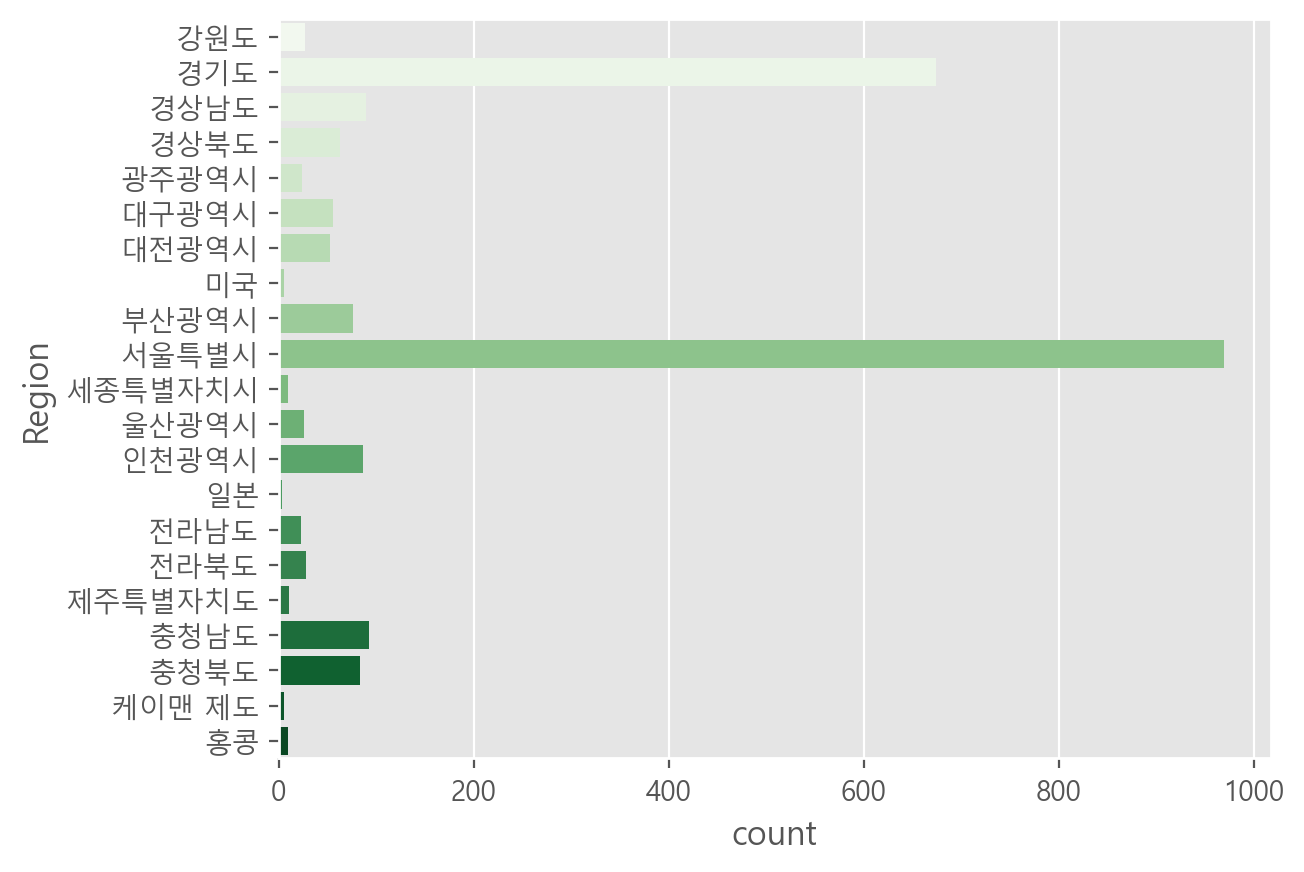

In [116]:
# Region 을 기준으로 정렬
sns.countplot(data=df_krx.sort_values(by="Region"), 
              palette="Greens",
              y="Region")

## 두 개의 변수 빈도수 구하고 시각화 하기
* crosstab 으로 빈도수 구하기
* seaborn의 countplot 으로 빈도수 시각화
* pandas의 plot 기능으로 시각화
    * lineplot : 연속된 데이터(숫자, 기간)
    * barplot : 비연속 데이터(범주형)
    * hist : 연속된 수치 데이터의 범주화

### 지역별 상장 시장 종목 빈도수 구하기
* pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기

In [117]:
# pd.crosstab 을 통한 2개의 변수에 대한 빈도수 구하기
pd.crosstab(df_krx["Market"], df_krx["Region"])

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,7,37,0,7,6,1,7,0,1,54,...,0,4,0,3,1,1,4,9,0,0
KOSDAQ,16,492,49,37,9,34,38,5,38,508,...,10,57,3,13,16,2,63,60,4,9
KOSPI,4,145,40,19,9,21,8,0,37,407,...,16,25,0,7,11,7,26,14,1,0


<AxesSubplot:xlabel='count', ylabel='Region'>

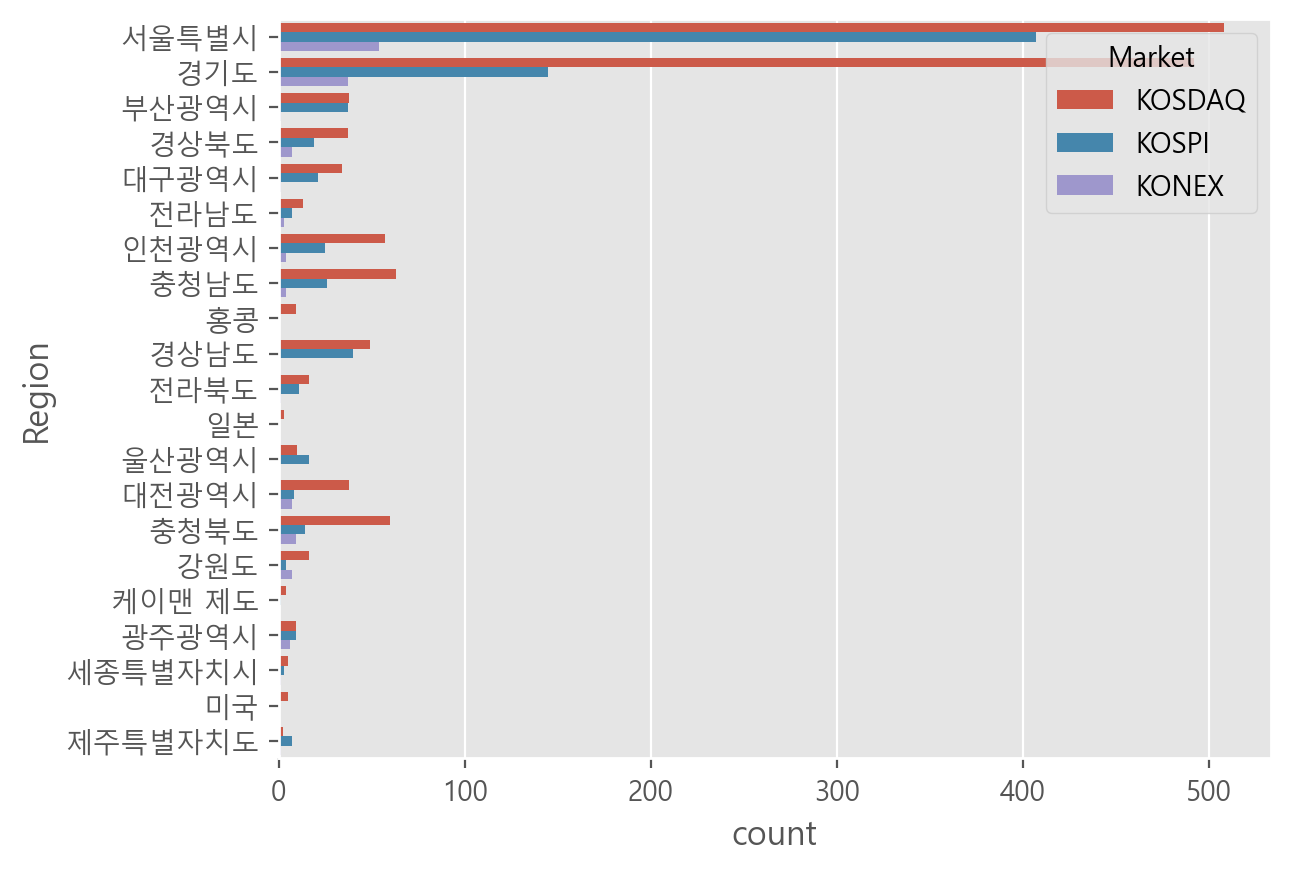

In [118]:
# countplot : Market 과 Region 으로 빈도수 시각화 
sns.countplot(data=df_krx, y="Region", hue="Market")

### 연도별 상장 종목 빈도수 분석

In [119]:
# Market, ListingYear 빈도수 구하기
df_market_year = pd.crosstab(df_krx["Market"], df_krx["ListingYear"])
df_market_year

ListingYear,1956.0,1962.0,1964.0,1966.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,...,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,2020.0
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,0,13,13,27,28,19,14,17,12
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,53,20,35,59,90,65,68,90,97,86
KOSPI,5,1,1,1,6,5,4,1,3,22,...,25,14,11,9,18,18,20,19,15,14


### seaborn을 통한 빈도수 시각화

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

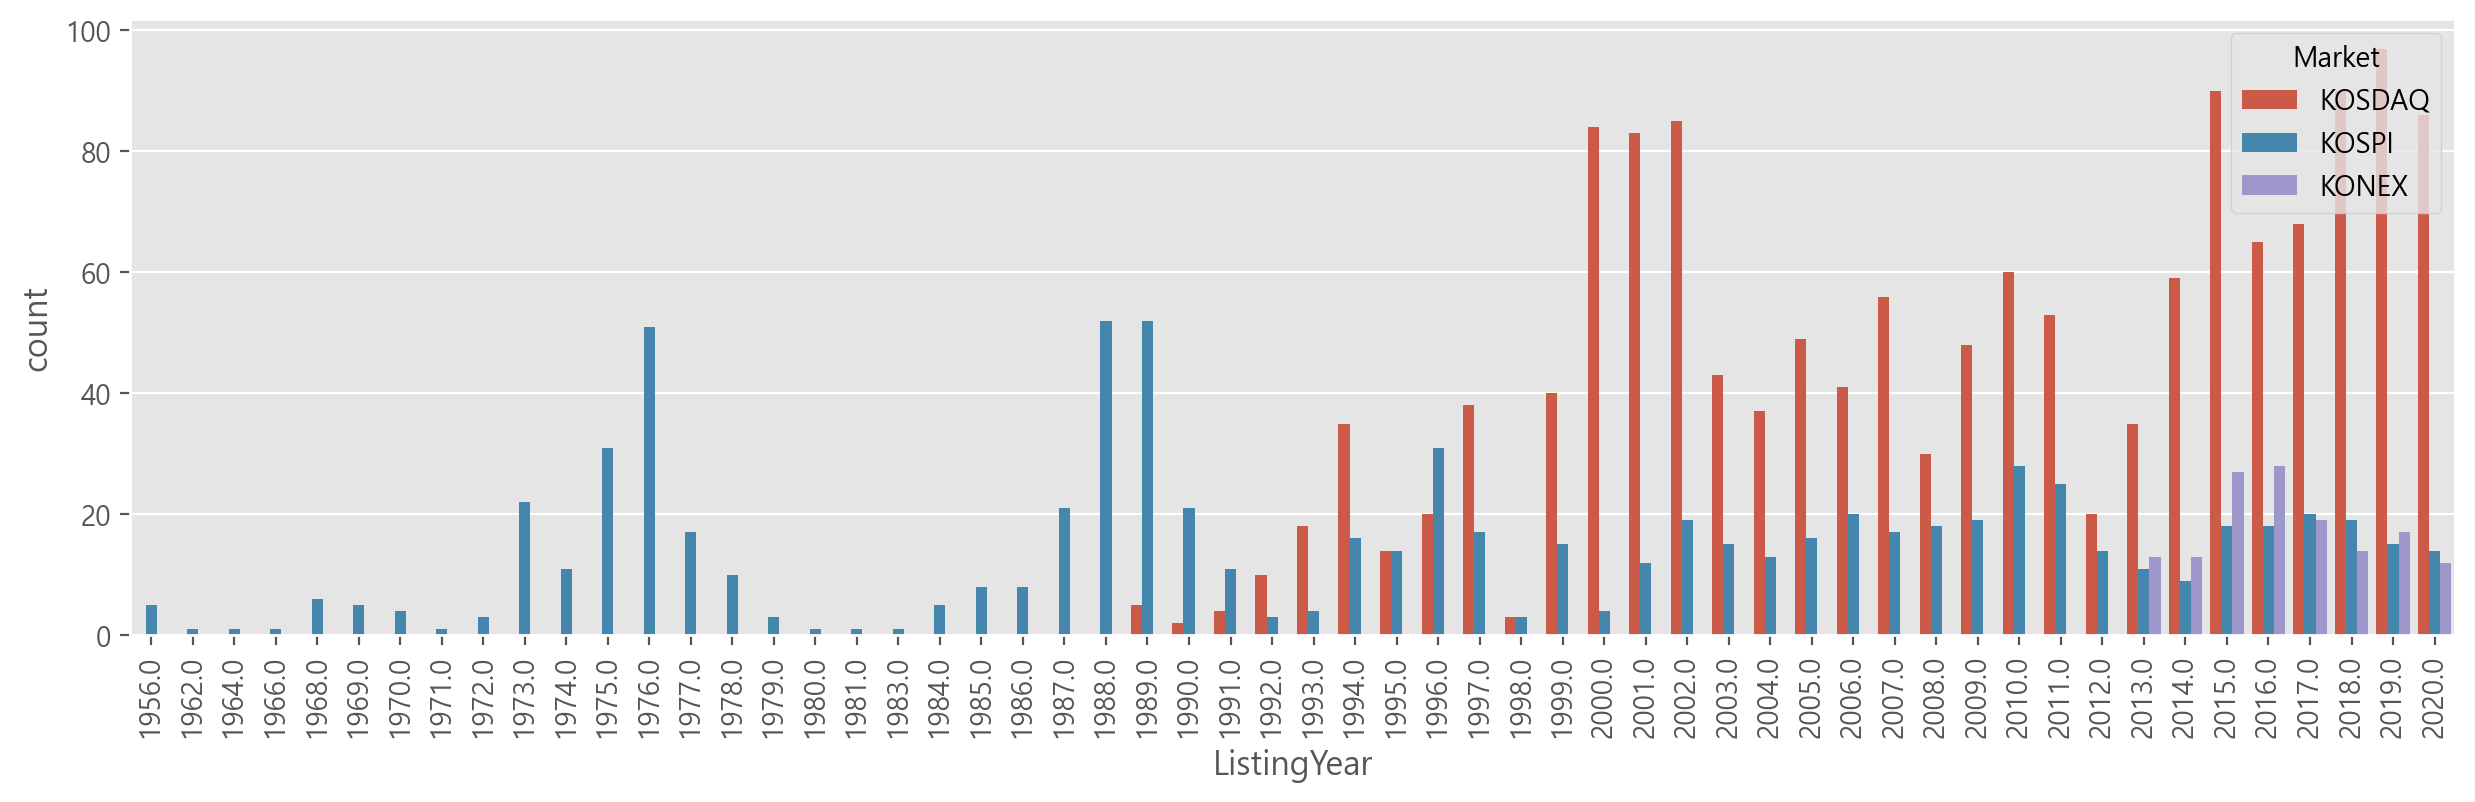

In [120]:
# Seaborn countplot 활용하여 빈도수를 표현
# hue 를 사용해 다른 변수를 함께 표현, hue는 색상을 의미
plt.figure(figsize=(15, 4))
plt.xticks(rotation=90)
sns.countplot(data=df_krx, x="ListingYear", hue="Market")

### Pandas를 통한 시각화

<AxesSubplot:xlabel='ListingYear'>

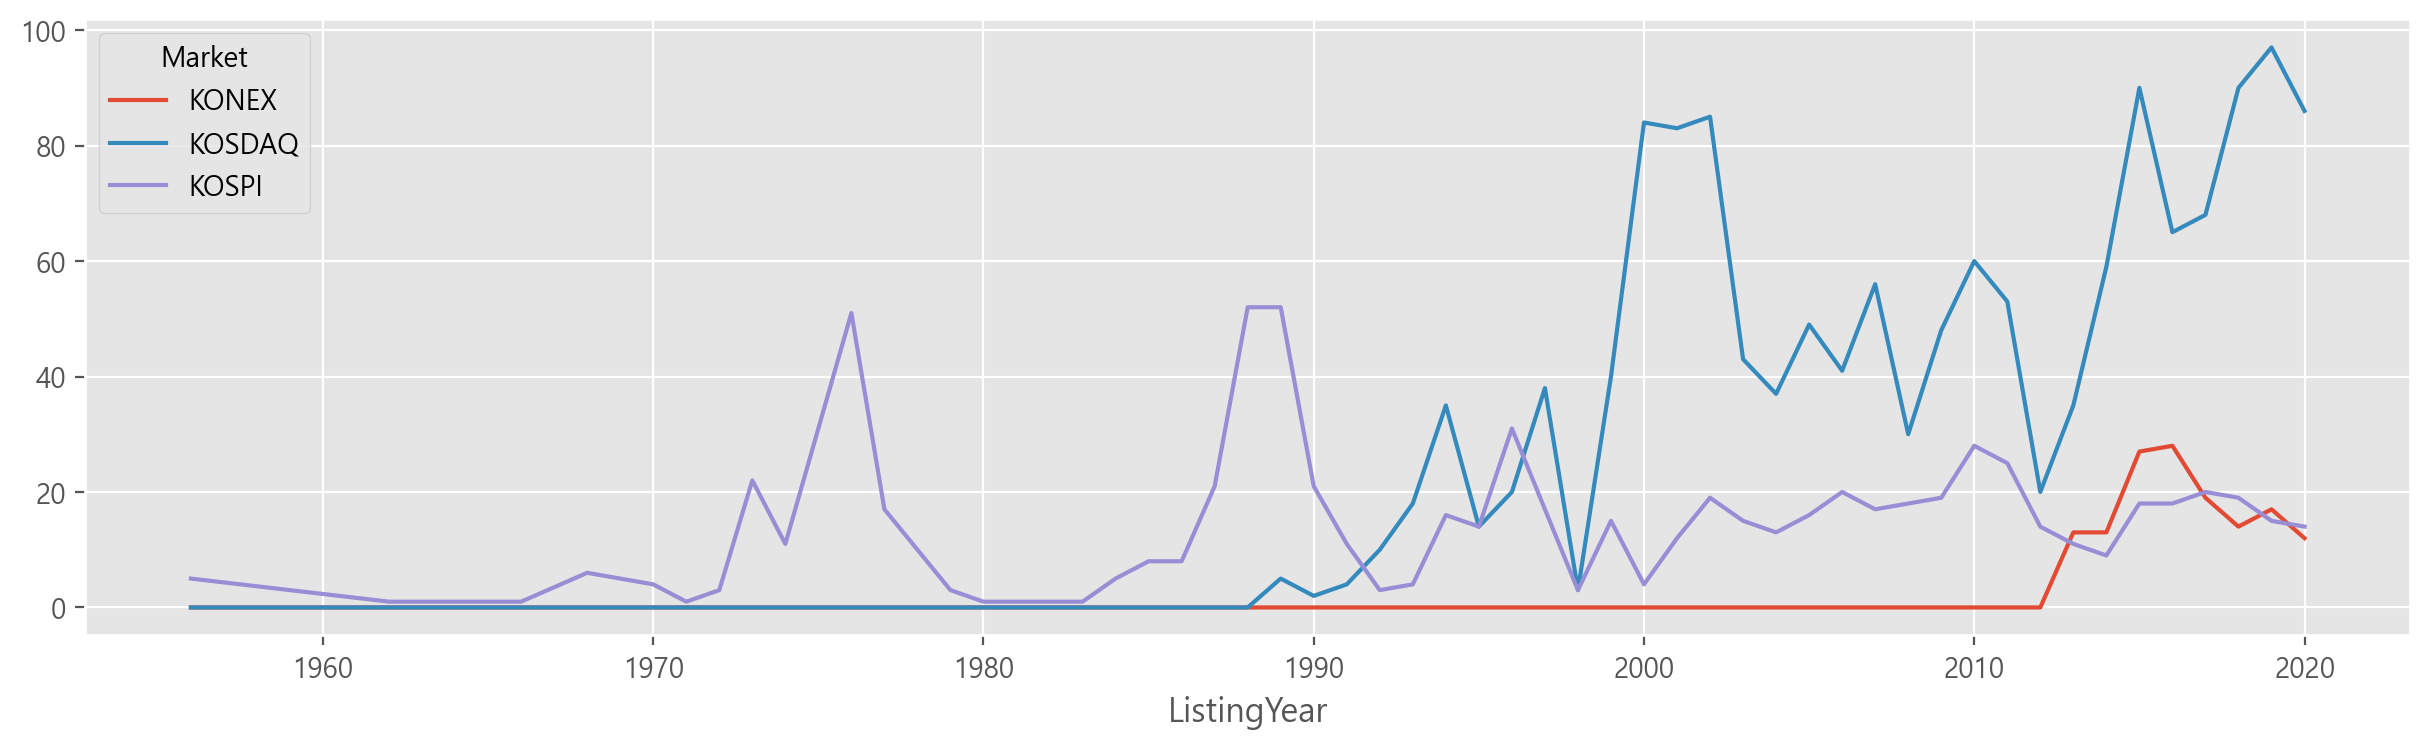

In [122]:
# Pandas plot 기능 활용하여 기본 그래프(line)를 그리기
# Pandas plot으로 그릴 때 x축에 인덱스 값이 y축에는 컬럼에 있는 값이 들어가며,
# 컬럼이 여러개라면 다른 색상으로 그려짐
df_market_year.T.plot(figsize=(15, 4))

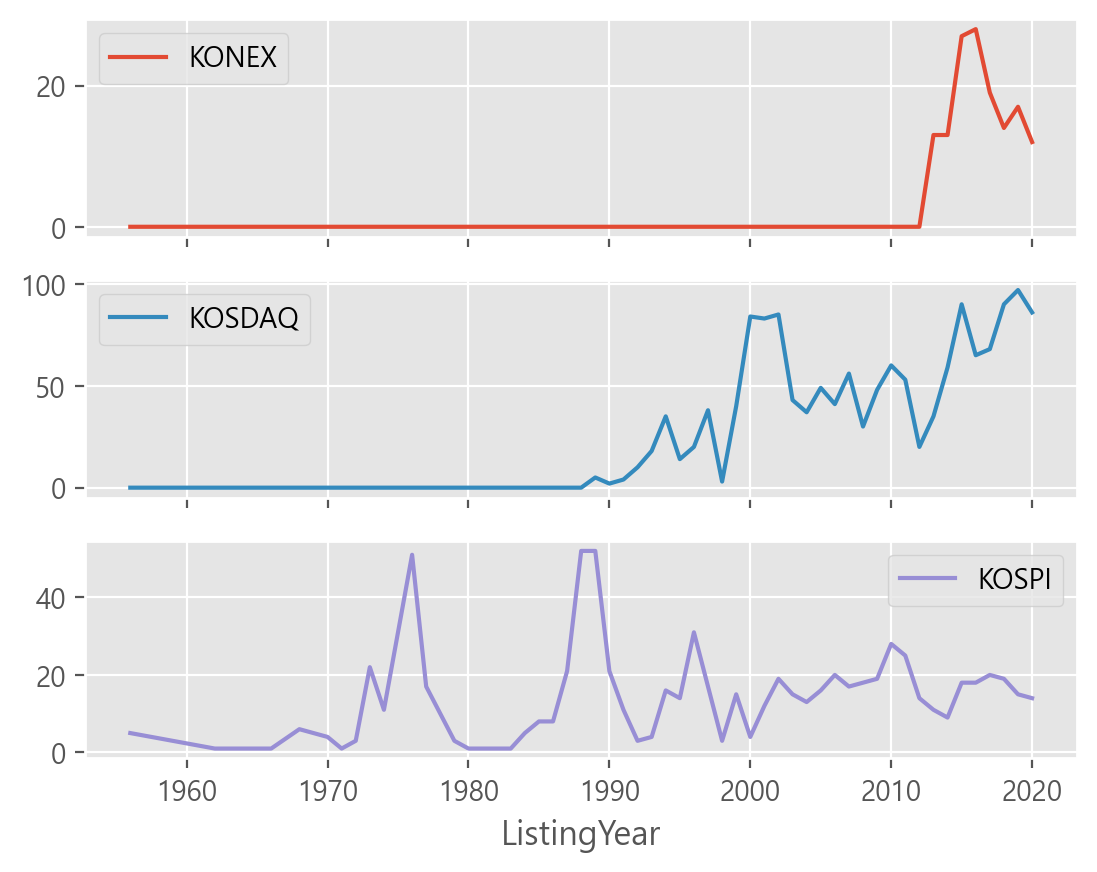

In [123]:
# 컬럼값을 subplots 으로 그리기
g = df_market_year.T.plot(subplots=True)

<AxesSubplot:xlabel='ListingYear'>

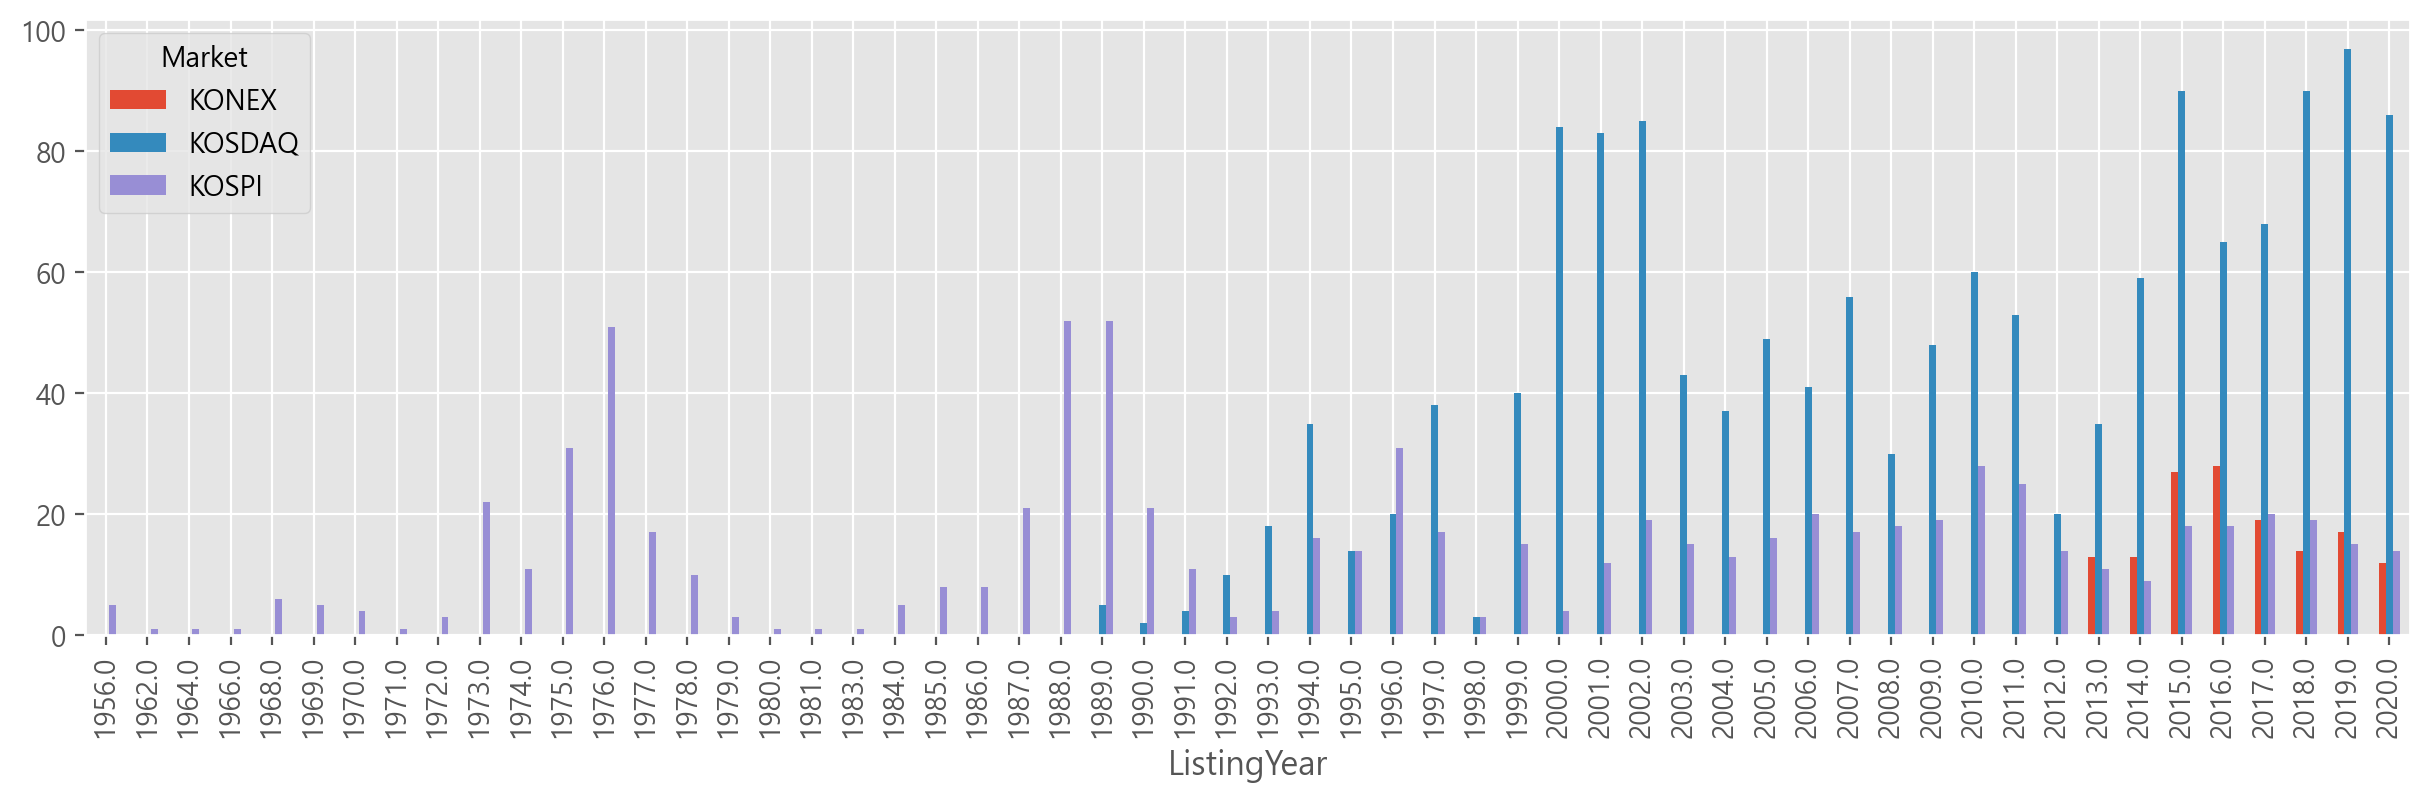

In [125]:
# Pandas plot 기능 활용하여 막대 그래프(bar, barh)를 그리기
df_market_year.T.plot.bar(figsize=(15, 4))

In [126]:
# 컬럼명의 데이터 타입을 int 형태로 변경
df_market_year.columns = df_market_year.columns.astype(int)
df_market_year

ListingYear,1956,1962,1964,1966,1968,1969,1970,1971,1972,1973,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
Market,,,,,,,,,,,,,,,,,,,,,
KONEX,0,0,0,0,0,0,0,0,0,0,...,0,0,13,13,27,28,19,14,17,12
KOSDAQ,0,0,0,0,0,0,0,0,0,0,...,53,20,35,59,90,65,68,90,97,86
KOSPI,5,1,1,1,6,5,4,1,3,22,...,25,14,11,9,18,18,20,19,15,14


<AxesSubplot:xlabel='ListingYear'>

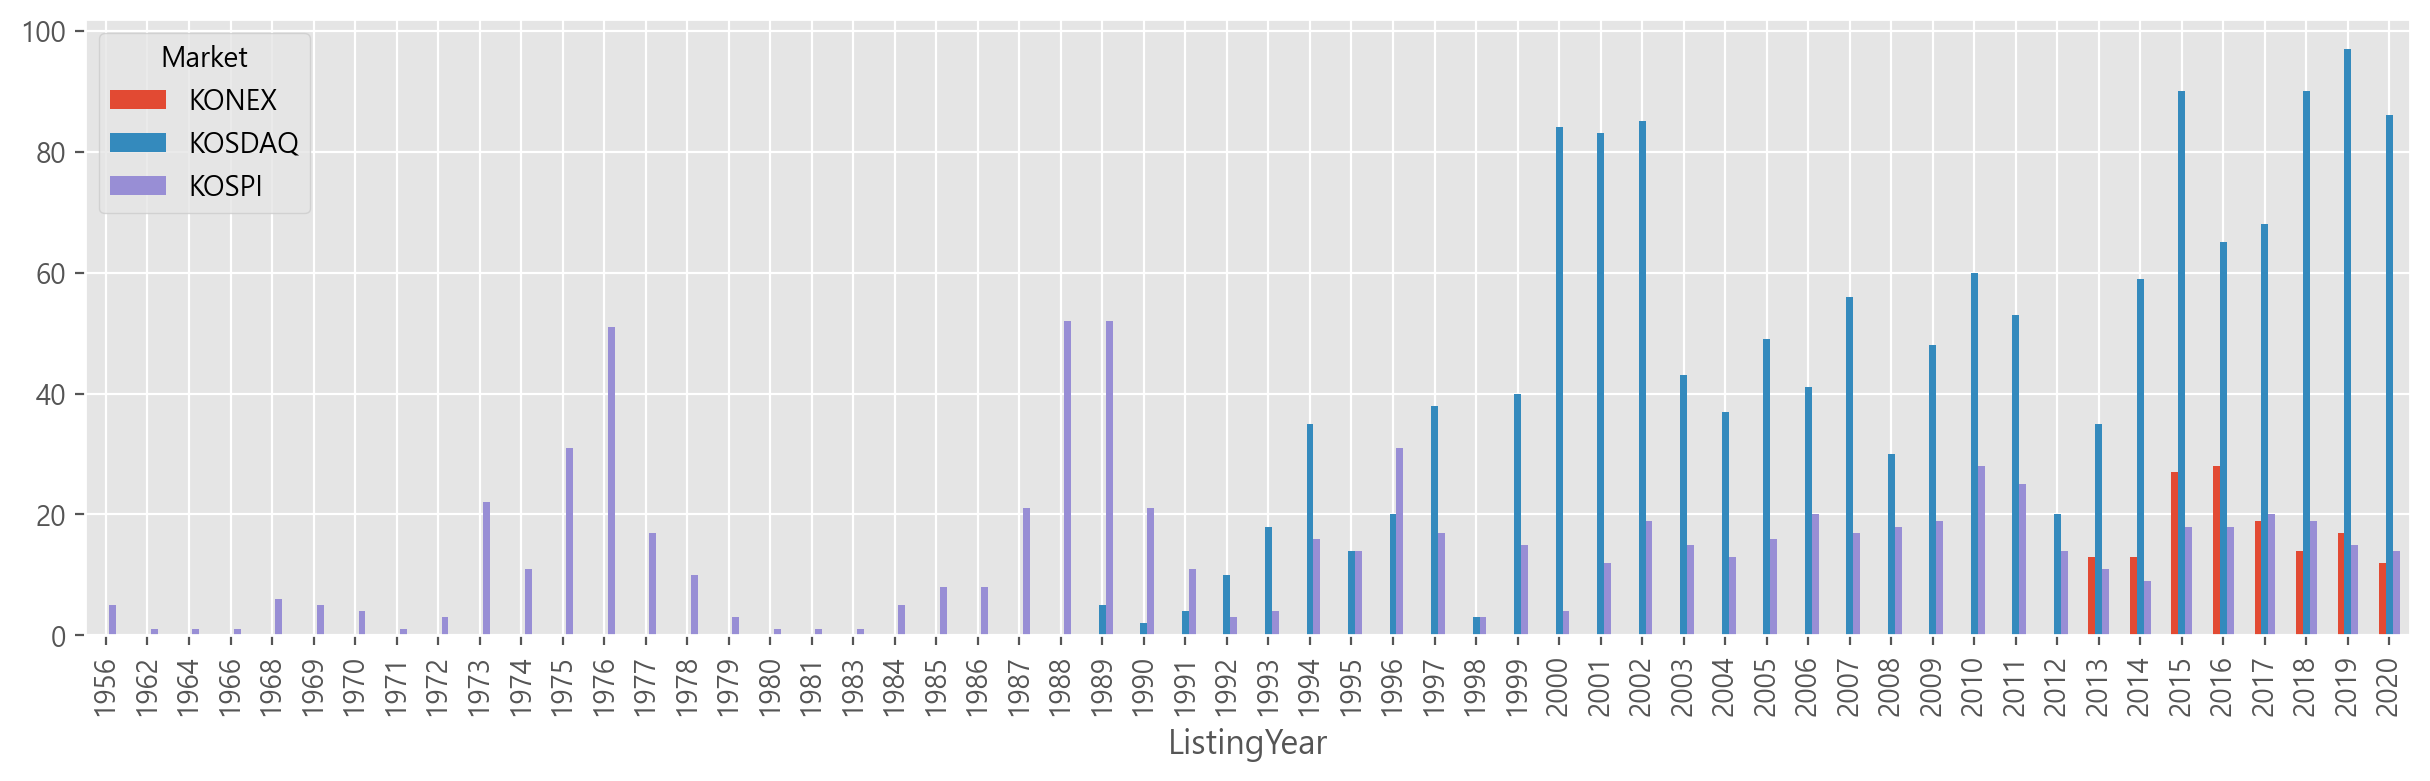

In [127]:
# 막대(bar)그래프 그리기
df_market_year.T.plot.bar(figsize=(15, 4))

### groupby 와 pivot_table로 빈도수 구하기
<img src="https://pandas.pydata.org/pandas-docs/stable/_images/06_valuecounts.svg">

* [How to calculate summary statistics? — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/getting_started/intro_tutorials/06_calculate_statistics.html)
* [Group by: split-apply-combine — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html)
* [pandas.pivot_table — pandas 1.2.0 documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html)

In [129]:
# groupby([인덱스 컬럼 리스트])[연산에 사용할 컬럼].연산()
df_year_market = df_krx.groupby(
    ["ListingYear", "Market"])["Symbol"].count().reset_index(name="count")
df_year_market 

,ListingYear,Market,count
0,1956.0,KOSPI,5
1,1962.0,KOSPI,1
2,1964.0,KOSPI,1
3,1966.0,KOSPI,1
4,1968.0,KOSPI,6
...,...,...,...
91,2019.0,KOSDAQ,97
92,2019.0,KOSPI,15
93,2020.0,KONEX,12
94,2020.0,KOSDAQ,86


In [131]:
# pivot_table로 같은 결과가 나오게 연산
df_year_market  = pd.pivot_table(data=df_krx, index=["ListingYear", "Market"], 
               values="Symbol", aggfunc="count")
df_year_market = df_year_market.reset_index()
df_year_market = df_year_market.rename(columns={"Symbol":"count"})
df_year_market

,ListingYear,Market,count
0,1956.0,KOSPI,5
1,1962.0,KOSPI,1
2,1964.0,KOSPI,1
3,1966.0,KOSPI,1
4,1968.0,KOSPI,6
...,...,...,...
91,2019.0,KOSDAQ,97
92,2019.0,KOSPI,15
93,2020.0,KONEX,12
94,2020.0,KOSDAQ,86


<AxesSubplot:xlabel='ListingYear', ylabel='count'>

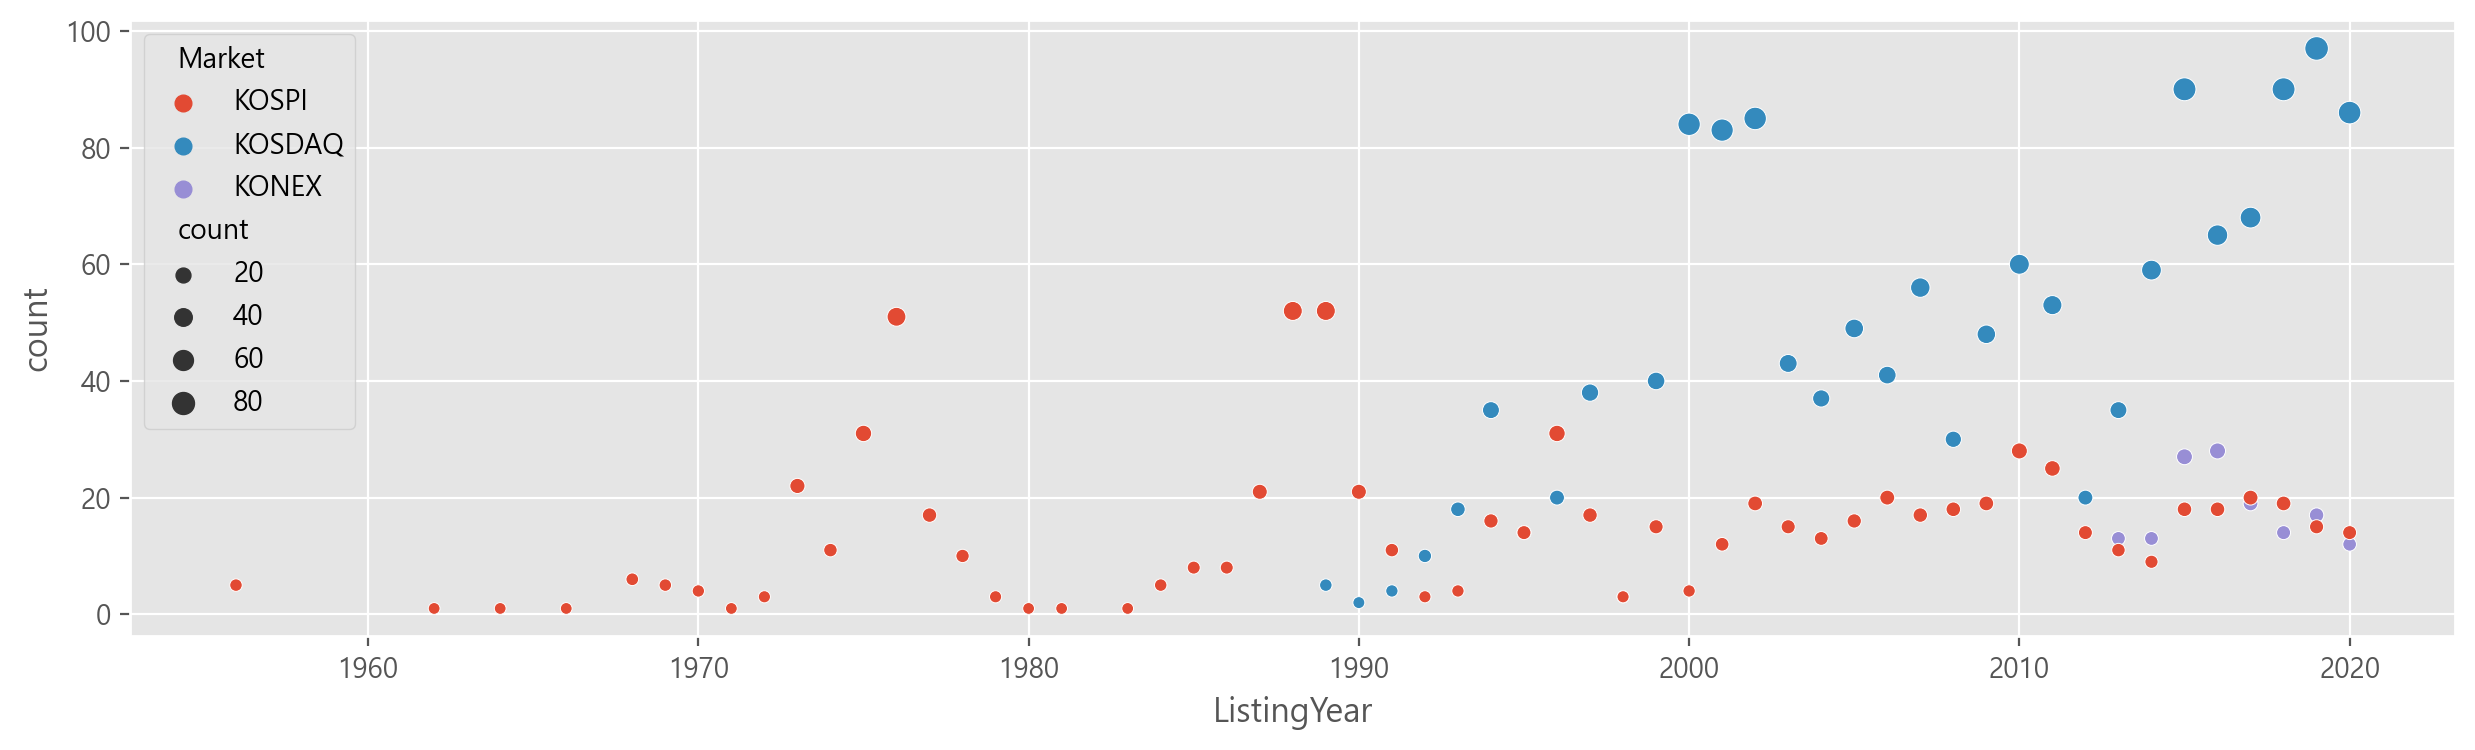

In [132]:
# 위의 groupby 결과를 scatterplot으로 그리기
plt.figure(figsize=(15, 4))
sns.scatterplot(data=df_year_market, 
                x="ListingYear", y="count", 
                hue="Market", size="count")

<AxesSubplot:xlabel='ListingYear', ylabel='count'>

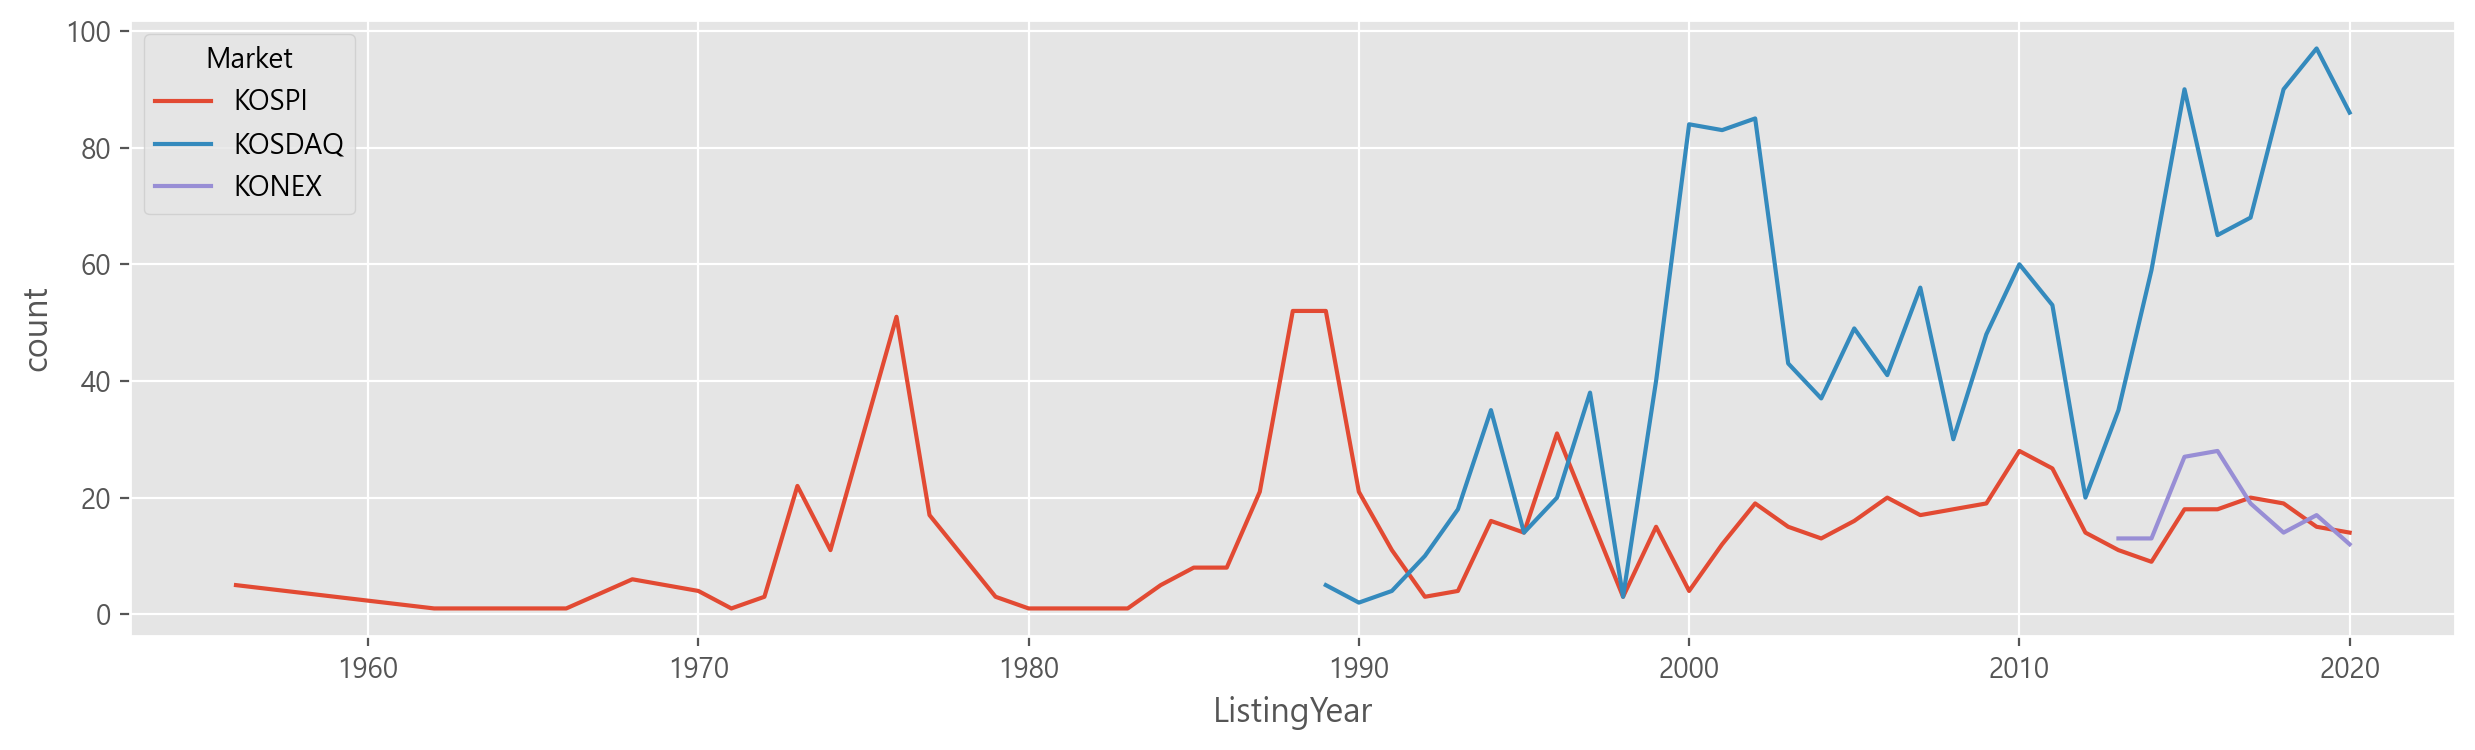

In [133]:
# lineplot 그리기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_year_market, x="ListingYear", y="count", hue="Market", ci=None)

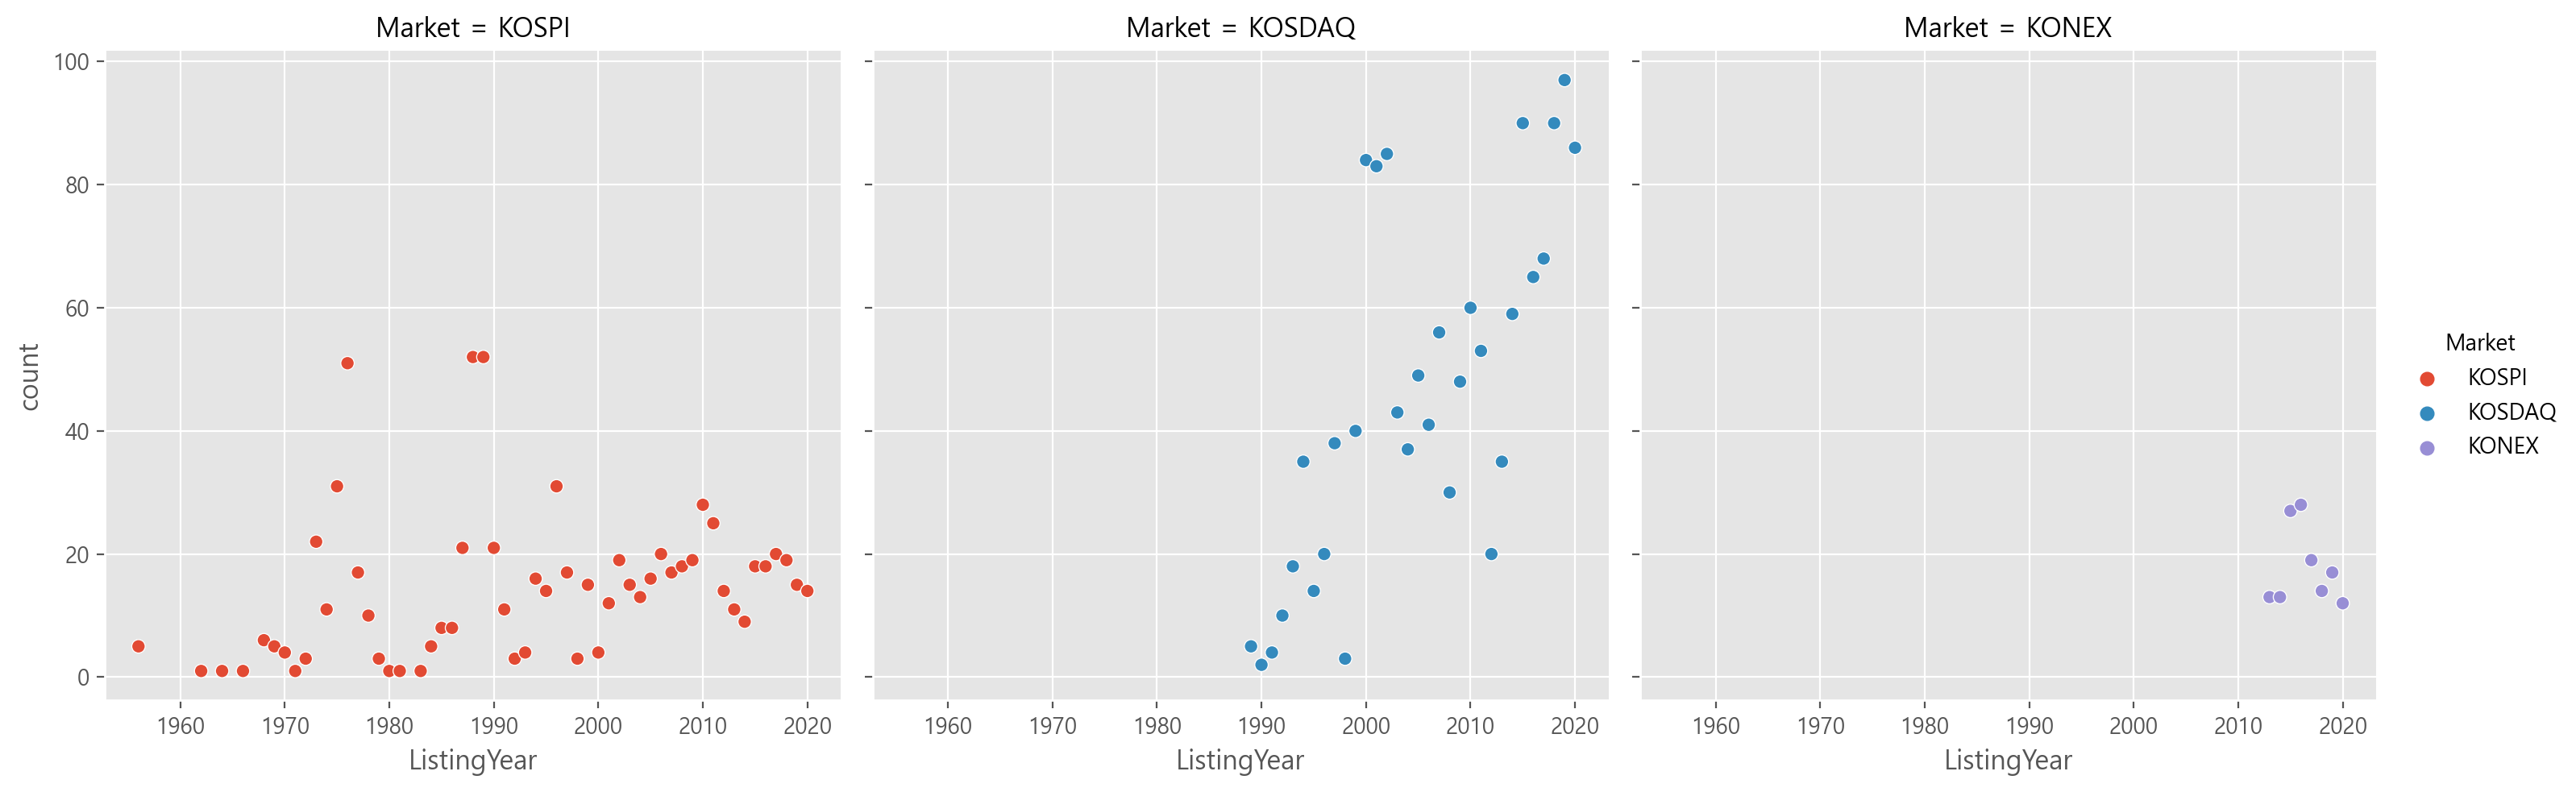

In [134]:
# relplot으로 subplot 그리기 - scatter
sns.relplot(data=df_year_market, x="ListingYear", y="count", 
            col="Market", hue="Market")

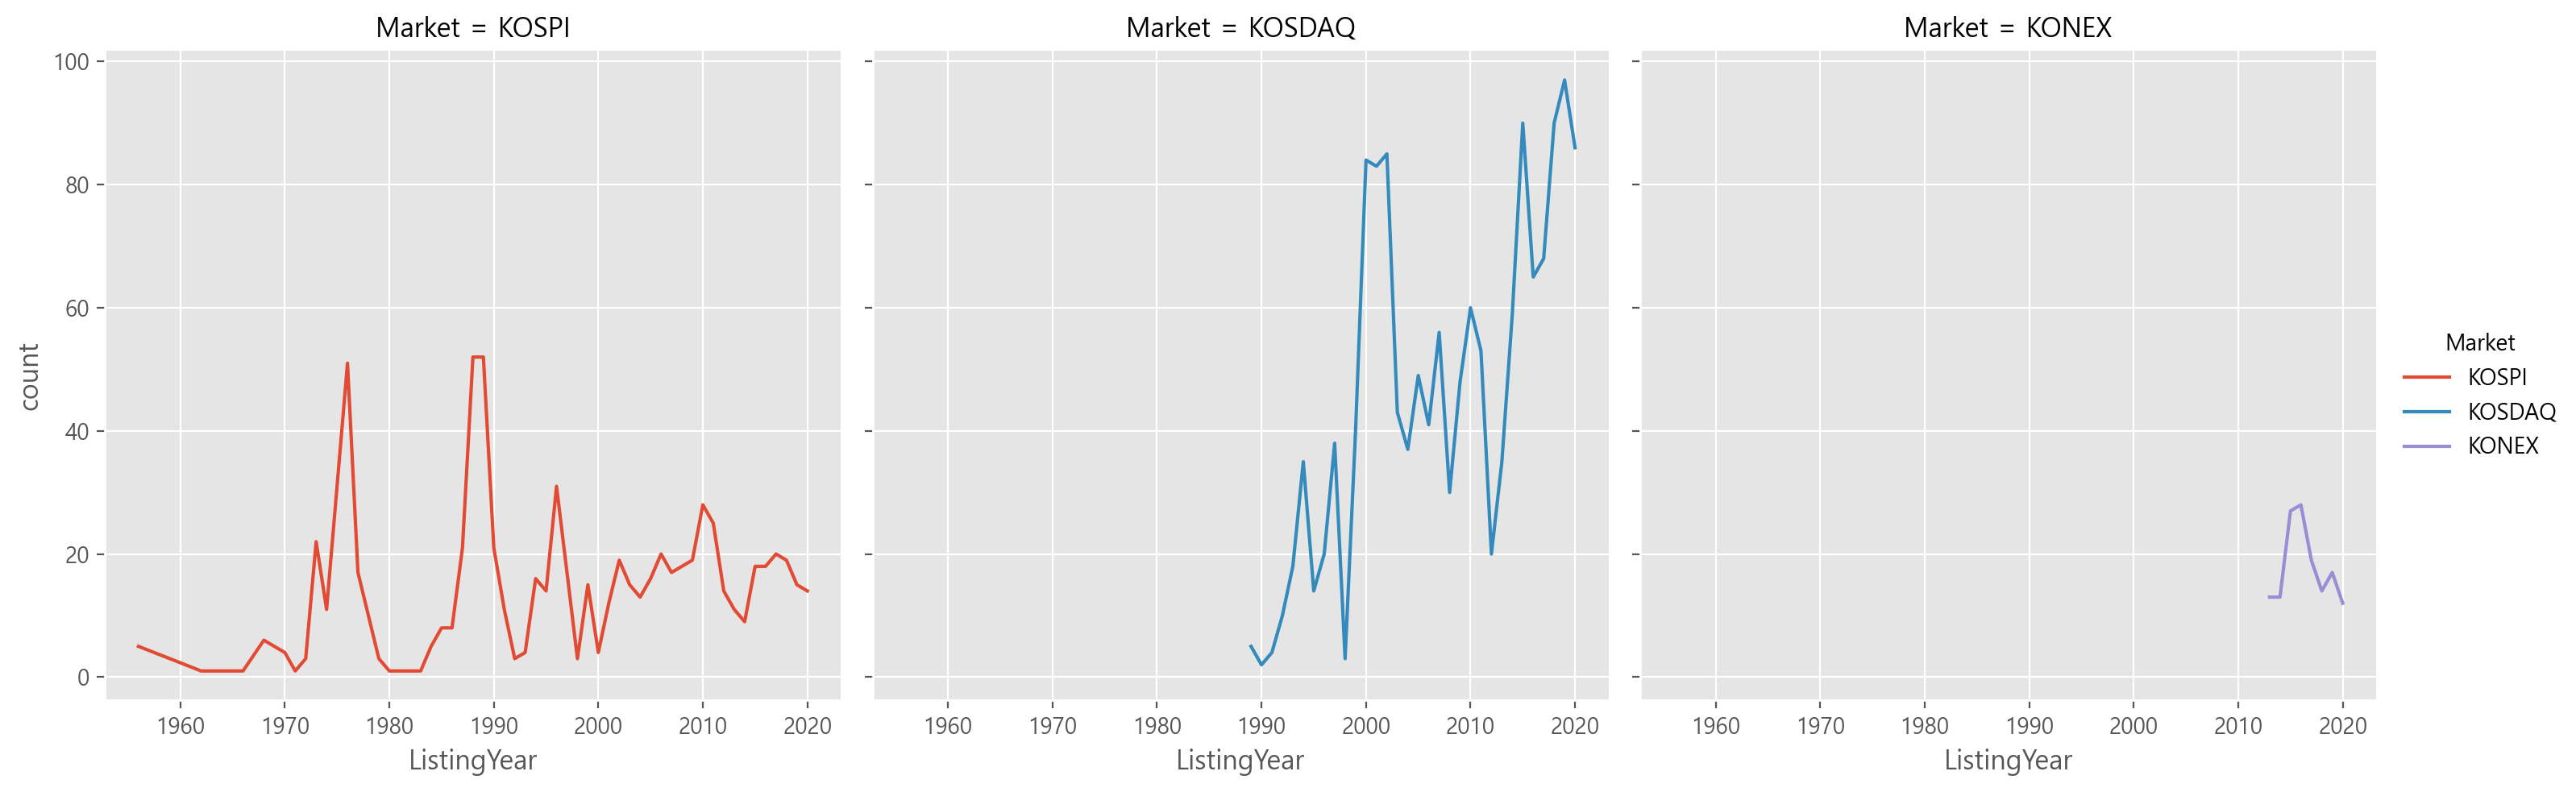

In [135]:
# relplot으로 subplot 그리기 - line

sns.relplot(data=df_year_market, x="ListingYear", y="count", 
            col="Market", hue="Market", kind="line")

### 구간화 binnig 과 히스토그램
* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

<AxesSubplot:title={'center':'상장연도'}, ylabel='Frequency'>

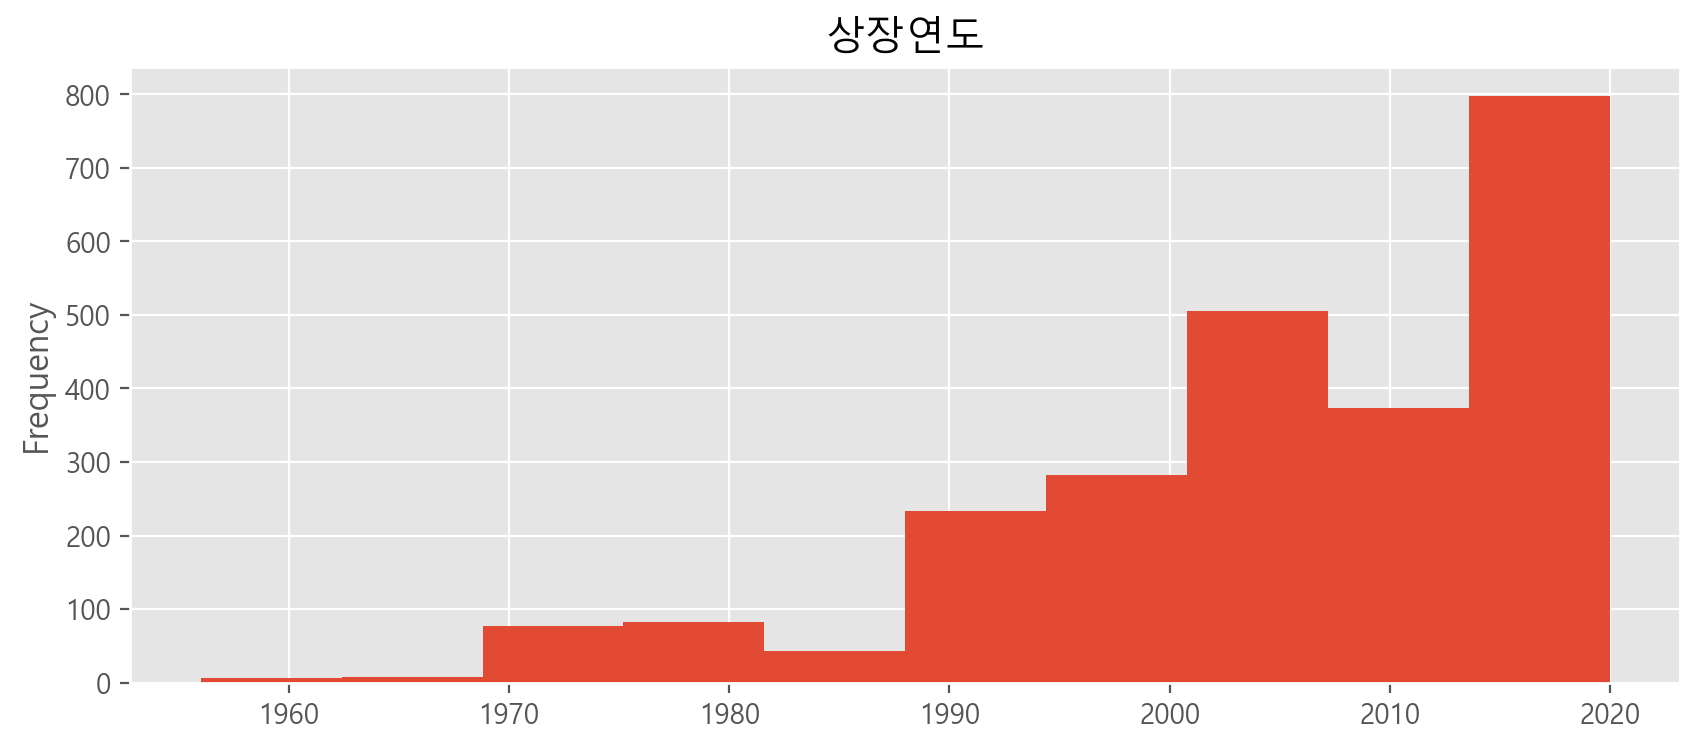

In [138]:
# bins 의 갯수에 따라 그래프의 표현 방법이 달라짐
df_krx["ListingYear"].plot.hist(bins=10, figsize=(10, 4), title="상장연도")

## 데이터 색인

In [140]:
# 케이맨 제도에 있는 회사 찾기
df_krx[df_krx["Region"] == "케이맨 제도"]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
283,900280,KOSDAQ,골든센츄리,기타 금융업,트랙터용 휠 및 타이어,2016-10-19,12월,주승화,http://www.jsj-wheel.co.kr,케이맨 제도,2016.0
317,900070,KOSDAQ,글로벌에스엠,기타 금융업,"자회사 제품 : IT기기용 정밀 화스너부품(스크류, 샤프트, 스프링)",2009-12-23,12월,나윤복,http://www.globalsmtech.com,케이맨 제도,2009.0
1250,900120,KOSDAQ,씨케이에이치,기타 금융업,건강보조식품,2010-03-31,06월,린진성,NaN,케이맨 제도,2010.0
1502,900140,KOSPI,엘브이엠씨홀딩스,자동차 판매업,지주회사,2010-11-30,12월,"오세영, 노성석, 김선발 (각자 대표이사)",http://www.lvmcholdings.net,케이맨 제도,2010.0
2138,900250,KOSDAQ,크리스탈신소재,기타 금융업,"합성운모 플레이크, 파우더, 테이프",2016-01-28,12월,다이중치우 (DAI ZHONG QIU),http://www.crystalnewmaterial.com,케이맨 제도,2016.0


In [141]:
# 1980년 이전에 상장한 기업찾기
df_krx[df_krx["ListingYear"] < 1980]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
9,001460,KOSPI,BYC,봉제의복 제조업,"메리야스,란제리 제조,도매/건축공사/부동산 임대,분양,공급",1975-06-02,12월,고 윤 성,http://home.byc.co.kr,서울특별시,1975.0
11,001040,KOSPI,CJ,기타 금융업,지주회사,1973-06-29,12월,"손경식, 김홍기",http://www.cj.net,서울특별시,1973.0
15,000120,KOSPI,CJ대한통운,도로 화물 운송업,"Contract Logistics, 포워딩, 항만하역, 해운, 택배국제특송, SCM...",1956-07-02,12월,박근희,http://www.cjlogistics.com,서울특별시,1956.0
26,000590,KOSPI,CS홀딩스,기타 금융업,"브랜드 수익, 자회사 배당",1975-12-22,12월,임규섭,http://www.chosunwelding.com,경상북도,1975.0
30,005830,KOSPI,DB손해보험,보험업,"자동차보험,화재보험,해상보험,특종보험,장기보험",1973-06-28,12월,김정남,http://www.idbins.com,서울특별시,1973.0
...,...,...,...,...,...,...,...,...,...,...,...
2544,005380,KOSPI,현대차,자동차용 엔진 및 자동차 제조업,"자동차(승용차,버스,트럭,특장차),자동차부품,자동차전착도료 제조,차량정비사업",1974-06-28,12월,"정의선, 하언태(각자 대표이사)",http://www.hyundai.com,서울특별시,1974.0
2577,004800,KOSPI,효성,기타 금융업,"스판덱스,합성원사,나일론,폴리에스터,타이어코드지,PET병,수지제품,중전기제품(변압기...",1973-06-30,12월,"Hyun-Joon Cho, Kyoo-Young Kim",http://www.hyosung.com,서울특별시,1973.0
2598,005010,KOSPI,휴스틸,1차 철강 제조업,"강관(배관용,구조용,유정용) 제조,도매",1973-06-29,12월,박훈,http://www.husteel.com,서울특별시,1973.0
2606,000540,KOSPI,흥국화재,보험업,손해보험,1974-12-05,12월,권중원,http://www.insurance.co.kr,서울특별시,1974.0


In [143]:
# 2020년 상장한 서울특별시에 소재한 코스피 종목 찾기

df_krx[(df_krx["ListingYear"] == 2020) & 
   (df_krx["Region"] == "서울특별시") & 
   (df_krx["Market"] == "KOSPI")]

,Symbol,Market,Name,Sector,Industry,ListingDate,SettleMonth,Representative,HomePage,Region,ListingYear
44,365550,KOSPI,ESR켄달스퀘어리츠,부동산 임대 및 공급업,부동산투자,2020-12-23,05월,박래익,http://www.esrks-reit.com,서울특별시,2020.0
824,357250,KOSPI,미래에셋맵스리츠,부동산 임대 및 공급업,부동산 임대업,2020-08-05,11월,김호식,http://www.maps1reit.miraeasset.com,서울특별시,2020.0
932,352820,KOSPI,빅히트,오디오물 출판 및 원판 녹음업,"음악 기획/제작, 퍼블리싱, 아티스트 매니지먼트",2020-10-15,12월,방시혁,http://www.bighitcorp.com,서울특별시,2020.0
1452,244920,KOSPI,에이플러스에셋,보험 및 연금관련 서비스업,보험대리 및 중개업,2020-11-20,12월,박경순,NaN,서울특별시,2020.0
1796,350520,KOSPI,이지스레지던스리츠,부동산 임대 및 공급업,"부동산투자, 취득, 매매, 임대",2020-08-05,06월,박영희,http://igisresidencereit.com/,서울특별시,2020.0
1801,334890,KOSPI,이지스밸류리츠,부동산 임대 및 공급업,"부동산투자, 취득, 매매, 임대",2020-07-16,08월,도병운,http://www.igisvaluereit.com,서울특별시,2020.0
1905,348950,KOSPI,제이알글로벌리츠,부동산 임대 및 공급업,벨기에 파이낸스 타워,2020-08-07,06월,오남수,http://jrglobalreit.com,서울특별시,2020.0
2033,344820,KOSPI,케이씨씨글라스,유리 및 유리제품 제조업,판유리 등,2020-01-21,12월,김내환,http://www.kccglass.co.kr,서울특별시,2020.0
2065,357120,KOSPI,코람코에너지리츠,부동산 임대 및 공급업,부동산 투자 및 관리,2020-08-31,11월,이성균,http://www.koramco.co.kr,서울특별시,2020.0
2213,363280,KOSPI,티와이홀딩스,기타 금융업,지주사업,2020-09-22,12월,유종연,http://www.ty-holdings.co.kr,서울특별시,2020.0


### 지역별 섹터

In [ ]:
# Sector, Region 으로 crosstab 연산
df_sr = pd.crosstab(df_krx["Sector"], df_krx["Region"])
df_sr

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
1차 비철금속 제조업,0,7,1,1,0,3,1,0,1,3,...,0,0,0,0,0,0,1,0,0,0
1차 철강 제조업,0,4,11,7,1,0,1,0,12,11,...,0,4,0,1,1,0,4,0,0,0
가구 제조업,0,4,0,0,0,0,0,0,0,3,...,0,1,0,0,0,0,0,0,0,0
가전제품 및 정보통신장비 소매업,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
가정용 기기 제조업,0,6,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
해상 운송업,0,0,0,0,0,0,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
화학섬유 제조업,0,1,0,1,0,1,0,0,0,6,...,0,0,0,0,1,0,0,0,0,0


### 컬럼과 인덱스 값으로 색인하기

In [146]:
# 특정 컬럼만 가져오기
df_sr[["서울특별시", "경기도", "인천광역시", "부산광역시"]]

Region,서울특별시,경기도,인천광역시,부산광역시
Sector,,,,
1차 비철금속 제조업,3,7,0,1
1차 철강 제조업,11,4,4,12
가구 제조업,3,4,1,0
가전제품 및 정보통신장비 소매업,1,0,0,0
가정용 기기 제조업,1,6,0,0
...,...,...,...,...
해상 운송업,5,0,0,0
"해체, 선별 및 원료 재생업",0,1,0,0
화학섬유 제조업,6,1,0,0


### 특정 행만 가져오기

* .loc[행]
* .loc[행, 열]
* .loc[조건식, 열]

In [147]:
# df_sr에서 "소프트웨어 개발 및 공급업" 행만 가져오기
df_sr.loc["소프트웨어 개발 및 공급업"].sort_values(ascending=False)

Region
서울특별시      89
경기도        38
일본          2
충청북도        2
홍콩          1
광주광역시       1
대전광역시       1
부산광역시       1
케이맨 제도      0
충청남도        0
제주특별자치도     0
전라북도        0
전라남도        0
강원도         0
인천광역시       0
울산광역시       0
미국          0
대구광역시       0
경상북도        0
경상남도        0
세종특별자치시     0
Name: 소프트웨어 개발 및 공급업, dtype: int64

In [148]:
# loc 로 행인덱스 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업" 가져오기
df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"]]

Region,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,미국,부산광역시,서울특별시,...,울산광역시,인천광역시,일본,전라남도,전라북도,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,,,,,,,,,,,,,,,,,
소프트웨어 개발 및 공급업,0,38,0,0,1,0,1,0,1,89,...,0,0,2,0,0,0,0,2,0,1
금융 지원 서비스업,0,0,0,0,0,0,0,0,0,71,...,0,0,0,0,0,0,0,0,0,0
의약품 제조업,5,35,1,0,0,0,2,0,1,38,...,0,2,0,0,0,0,2,5,0,0


In [150]:
# loc로 여러 행과 열 가져오기

df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], 
          ["서울특별시", "경기도", "인천광역시", "부산광역시"]]

Region,서울특별시,경기도,인천광역시,부산광역시
Sector,,,,
소프트웨어 개발 및 공급업,89,38,0,1
금융 지원 서비스업,71,0,0,0
의약품 제조업,38,35,2,1


In [151]:
# loc 로 행, 컬럼 가져오기
# 행에서 "소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"
# 열에서 "서울특별시" 가져오기
df_sr.loc[["소프트웨어 개발 및 공급업", "금융 지원 서비스업", "의약품 제조업"], "서울특별시"]

Sector
소프트웨어 개발 및 공급업    89
금융 지원 서비스업        71
의약품 제조업           38
Name: 서울특별시, dtype: int64

<AxesSubplot:ylabel='Region'>

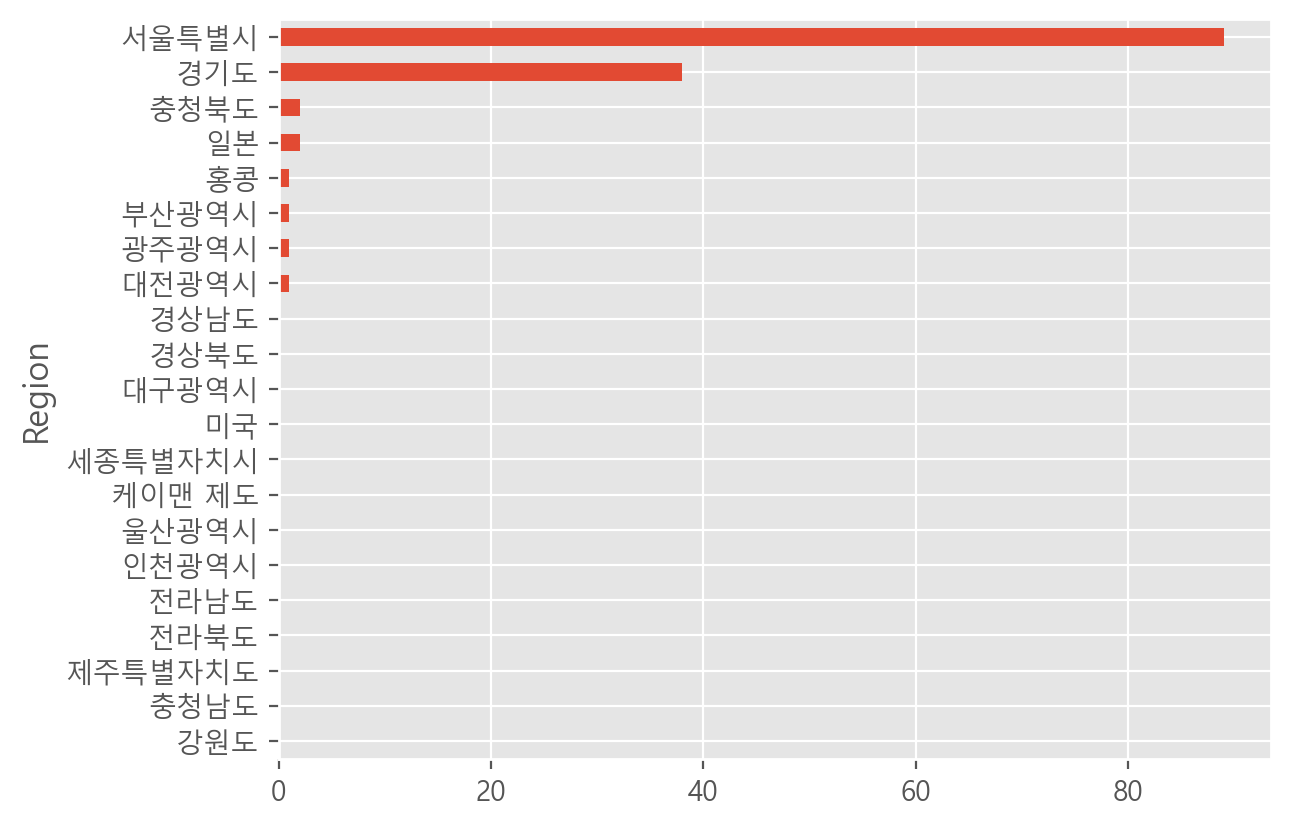

In [152]:
# "소프트웨어 개발 및 공급업" 만 가져와서 막대그래프를 그리기

df_sr.loc["소프트웨어 개발 및 공급업"].sort_values().plot.barh()

<AxesSubplot:ylabel='Region'>

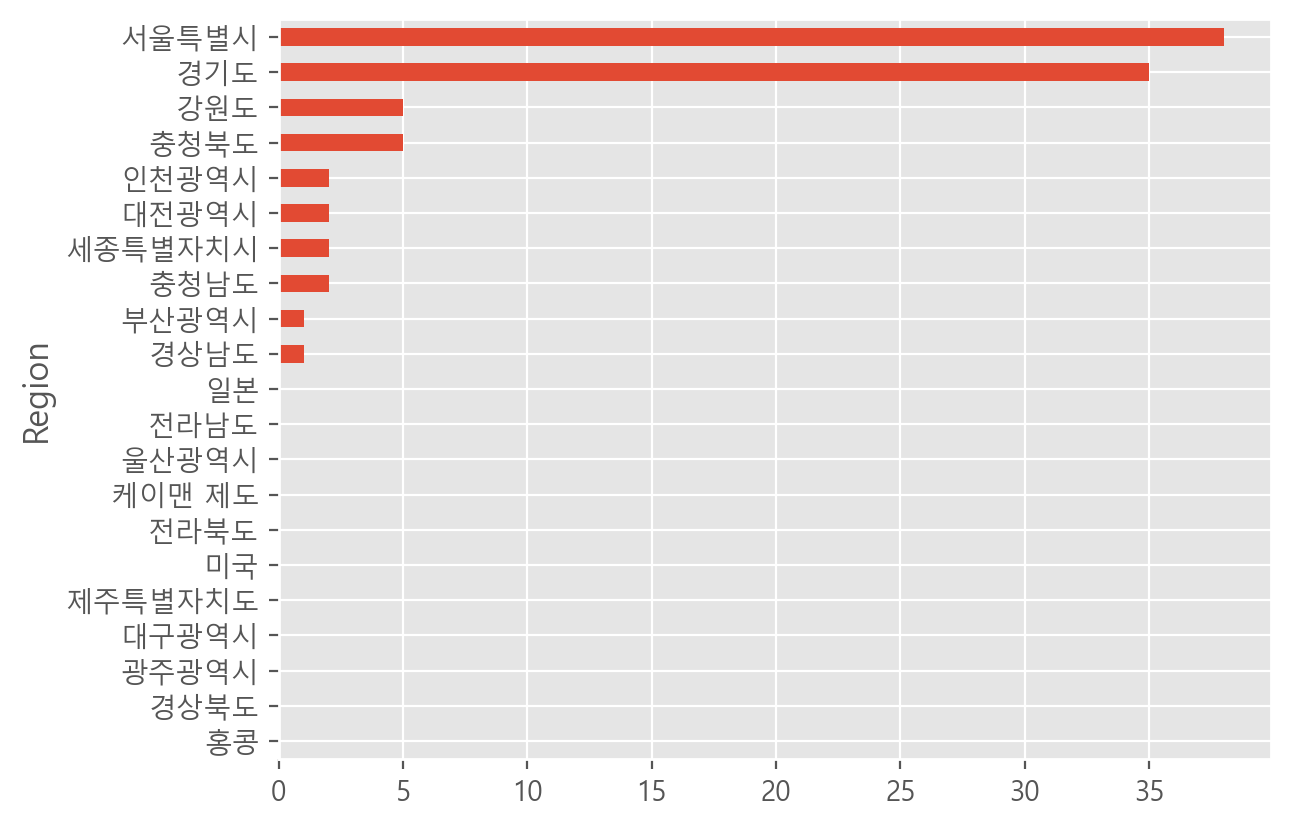

In [153]:
# "의약품 제조업" 만 가져와서 막대그래프 그리기

df_sr.loc["의약품 제조업"].sort_values().plot.barh()

In [154]:
# iloc[행]
# iloc[행,열]
df_sr.iloc[-5:, -5:]

Region,제주특별자치도,충청남도,충청북도,케이맨 제도,홍콩
Sector,,,,,
해상 운송업,0,0,0,0,0
"해체, 선별 및 원료 재생업",0,0,0,0,0
화학섬유 제조업,0,0,0,0,0
환경 정화 및 복원업,0,1,0,0,0
회사 본부 및 경영 컨설팅 서비스업,0,0,0,0,0
